# Starbucks Capstone Challenge

### Introduction

This data set contains simulated data that mimics customer behavior on the Starbucks rewards mobile app. Once every few days, Starbucks sends out an offer to users of the mobile app. An offer can be merely an advertisement for a drink or an actual offer such as a discount or BOGO (buy one get one free). Some users might not receive any offer during certain weeks. 

Not all users receive the same offer, and that is the challenge to solve with this data set.

Your task is to combine transaction, demographic and offer data to determine which demographic groups respond best to which offer type. This data set is a simplified version of the real Starbucks app because the underlying simulator only has one product whereas Starbucks actually sells dozens of products.

Every offer has a validity period before the offer expires. As an example, a BOGO offer might be valid for only 5 days. You'll see in the data set that informational offers have a validity period even though these ads are merely providing information about a product; for example, if an informational offer has 7 days of validity, you can assume the customer is feeling the influence of the offer for 7 days after receiving the advertisement.

You'll be given transactional data showing user purchases made on the app including the timestamp of purchase and the amount of money spent on a purchase. This transactional data also has a record for each offer that a user receives as well as a record for when a user actually views the offer. There are also records for when a user completes an offer. 

Keep in mind as well that someone using the app might make a purchase through the app without having received an offer or seen an offer.

### Example

To give an example, a user could receive a discount offer buy 10 dollars get 2 off on Monday. The offer is valid for 10 days from receipt. If the customer accumulates at least 10 dollars in purchases during the validity period, the customer completes the offer.

However, there are a few things to watch out for in this data set. Customers do not opt into the offers that they receive; in other words, a user can receive an offer, never actually view the offer, and still complete the offer. For example, a user might receive the "buy 10 dollars get 2 dollars off offer", but the user never opens the offer during the 10 day validity period. The customer spends 15 dollars during those ten days. There will be an offer completion record in the data set; however, the customer was not influenced by the offer because the customer never viewed the offer.

### Cleaning

This makes data cleaning especially important and tricky.

You'll also want to take into account that some demographic groups will make purchases even if they don't receive an offer. From a business perspective, if a customer is going to make a 10 dollar purchase without an offer anyway, you wouldn't want to send a buy 10 dollars get 2 dollars off offer. You'll want to try to assess what a certain demographic group will buy when not receiving any offers.

### Final Advice

Because this is a capstone project, you are free to analyze the data any way you see fit. For example, you could build a machine learning model that predicts how much someone will spend based on demographics and offer type. Or you could build a model that predicts whether or not someone will respond to an offer. Or, you don't need to build a machine learning model at all. You could develop a set of heuristics that determine what offer you should send to each customer (i.e., 75 percent of women customers who were 35 years old responded to offer A vs 40 percent from the same demographic to offer B, so send offer A).

# Data Sets

The data is contained in three files:

* portfolio.json - containing offer ids and meta data about each offer (duration, type, etc.)
* profile.json - demographic data for each customer
* transcript.json - records for transactions, offers received, offers viewed, and offers completed

Here is the schema and explanation of each variable in the files:

**portfolio.json**
* id (string) - offer id
* offer_type (string) - type of offer ie BOGO, discount, informational
* difficulty (int) - minimum required spend to complete an offer
* reward (int) - reward given for completing an offer
* duration (int) - time for offer to be open, in days
* channels (list of strings)

**profile.json**
* age (int) - age of the customer 
* became_member_on (int) - date when customer created an app account
* gender (str) - gender of the customer (note some entries contain 'O' for other rather than M or F)
* id (str) - customer id
* income (float) - customer's income

**transcript.json**
* event (str) - record description (ie transaction, offer received, offer viewed, etc.)
* person (str) - customer id
* time (int) - time in hours since start of test. The data begins at time t=0
* value - (dict of strings) - either an offer id or transaction amount depending on the record

**Note:** If you are using the workspace, you will need to go to the terminal and run the command `conda update pandas` before reading in the files. This is because the version of pandas in the workspace cannot read in the transcript.json file correctly, but the newest version of pandas can. You can access the termnal from the orange icon in the top left of this notebook.  

You can see how to access the terminal and how the install works using the two images below.  First you need to access the terminal:

<img src="pic1.png"/>

Then you will want to run the above command:

<img src="pic2.png"/>

Finally, when you enter back into the notebook (use the jupyter icon again), you should be able to run the below cell without any errors.

# 1. Business Understanding

### 1.1 Project Overview: 

<font size="4"> Starbucks collects its customers' data, and they are using it to knowing permanent customers, and they providing a special offers to their customers for certain products as well as marketing products better by reducing advertising costs and marketing less-selling products.
<br/>
<br/>
The data set contain some of the data that mimic customer behavior like the offer that sent to customer is he looked at the offer or not, did he receive it and how the customer is responding to the offers.
In this project, I will combining the data together and clean and analyze the data to extract some information from that data.</font>

### 1.2 Questions 
<font size="4"> Starbucks has sets of data contain information about customers and the purchase transactions and they are want to understand their customers to provide them offers based on transactions and regularity of customers so they have some Questions like as:
- Forecasting the membership based on gender
- Avarege of customer age
- Analyzing the percent of customers base on year of regester as a member
- most channels effect on customers
- Number of transactions based on age 
- Number of transactions based on events
</font>


### 1.3 Problem Statement and  Metrics:

<font size="4">The goal of the project is to build a model that predicts if the offer will be accepted by the customer or not.
So the way is combining the two files together (the transcript file which contains all transactions and customers behavior ) the second file is (profile file that contains demographics  data about customers like age, income)   and the last file is ( a portfolio which contains the offers data like points, offer type, reward, and channels).
    <br/>
    <br/>
So based on the model results  I am going to evaluate the accuracy of the model by checking the F-score of model for a successful transaction that seen by the customer so if the accuracy of the model is low that is mean the model not good and we will not use it otherwise if the accuracy is high and it satisfied we will use the model on that data.</font>

# 2. Data Understanding

The data is contained in three files:

* portfolio.json - containing offer ids and meta data about each offer (duration, type, etc.)
* profile.json - demographic data for each customer
* transcript.json - records for transactions, offers received, offers viewed, and offers completed

**portfolio.json**
* id (string) - offer id
* offer_type (string) - type of offer ie BOGO, discount, informational
* difficulty (int) - minimum required spend to complete an offer
* reward (int) - reward given for completing an offer
* duration (int) - time for offer to be open, in days
* channels (list of strings)

**profile.json**
* age (int) - age of the customer 
* became_member_on (int) - date when customer created an app account
* gender (str) - gender of the customer (note some entries contain 'O' for other rather than M or F)
* id (str) - customer id
* income (float) - customer's income

**transcript.json**
* event (str) - record description (ie transaction, offer received, offer viewed, etc.)
* person (str) - customer id
* time (int) - time in hours since start of test. The data begins at time t=0
* value - (dict of strings) - either an offer id or transaction amount depending on the record

In [200]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import json
from datetime import datetime
from matplotlib import dates 
import locale
import seaborn as sns
% matplotlib inline
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [94]:
# read in the json files
portfolio = pd.read_json('data/portfolio.json', orient='records', lines=True)
profile = pd.read_json('data/profile.json', orient='records', lines=True)
transcript = pd.read_json('data/transcript.json', orient='records', lines=True)

In [95]:
portfolio.head()

,channels,difficulty,duration,id,offer_type,reward
0,"[email, mobile, social]",10,7,ae264e3637204a6fb9bb56bc8210ddfd,bogo,10
1,"[web, email, mobile, social]",10,5,4d5c57ea9a6940dd891ad53e9dbe8da0,bogo,10
2,"[web, email, mobile]",0,4,3f207df678b143eea3cee63160fa8bed,informational,0
3,"[web, email, mobile]",5,7,9b98b8c7a33c4b65b9aebfe6a799e6d9,bogo,5
4,"[web, email]",20,10,0b1e1539f2cc45b7b9fa7c272da2e1d7,discount,5


In [96]:
portfolio.shape

(10, 6)

In [97]:
portfolio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
channels      10 non-null object
difficulty    10 non-null int64
duration      10 non-null int64
id            10 non-null object
offer_type    10 non-null object
reward        10 non-null int64
dtypes: int64(3), object(3)
memory usage: 560.0+ bytes


In [98]:
profile.head()

,age,became_member_on,gender,id,income
0,118,20170212,None,68be06ca386d4c31939f3a4f0e3dd783,NaN
1,55,20170715,F,0610b486422d4921ae7d2bf64640c50b,112000.0
2,118,20180712,None,38fe809add3b4fcf9315a9694bb96ff5,NaN
3,75,20170509,F,78afa995795e4d85b5d9ceeca43f5fef,100000.0
4,118,20170804,None,a03223e636434f42ac4c3df47e8bac43,NaN


In [99]:
profile.shape

(17000, 5)

In [100]:
profile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 5 columns):
age                 17000 non-null int64
became_member_on    17000 non-null int64
gender              14825 non-null object
id                  17000 non-null object
income              14825 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 664.1+ KB


### Check for missing values in numeric columns

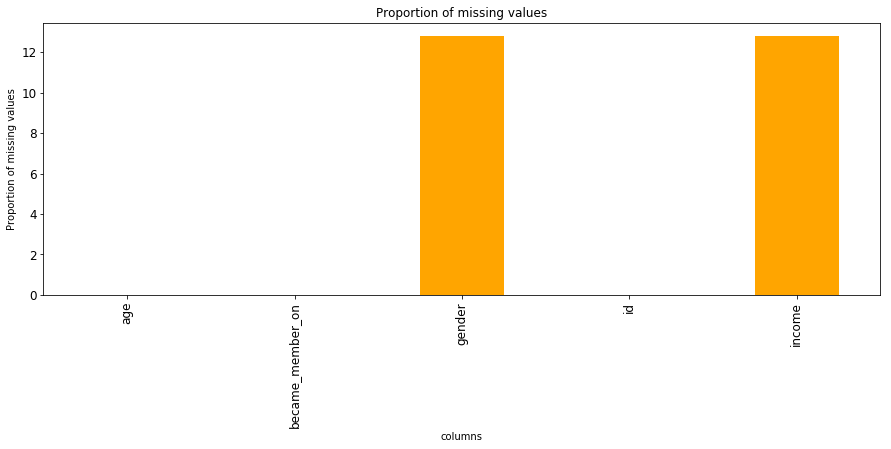

In [101]:
fig,axes=plt.subplots(1,1,figsize=(15,5))
(profile.isnull().sum()/profile.shape[0]*100).plot(kind='bar',color='orange');
plt.xticks(fontsize=12),plt.yticks(fontsize=12);
plt.title('Proportion of missing values')
plt.xlabel('columns')
plt.ylabel('Proportion of missing values');

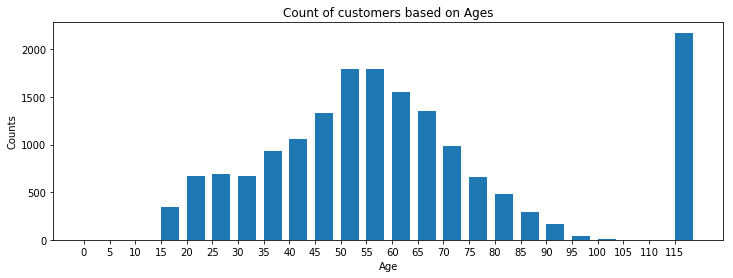

In [102]:
agegroup_age=profile.groupby(pd.cut(profile['age'], np.arange(0, 118+5, 5)))['id'].count()
plt.figure(figsize=(12,4))
plt.bar(np.arange(0, 118, 5),agegroup_age,width=3.5, align='edge')
plt.xticks(np.arange(0, 118, 5))
plt.xlabel('Age')
plt.ylabel('Counts')
plt.title('Count of customers based on Ages')
plt.show()

we can see there is coustomers above 115 years more than 2000 customer and it is highest then other ages which is not make sence so we can see this is is defintaly outlier so we must deleted thos customers

In [103]:
transcript.head()

,event,person,time,value
0,offer received,78afa995795e4d85b5d9ceeca43f5fef,0,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'}
1,offer received,a03223e636434f42ac4c3df47e8bac43,0,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}
2,offer received,e2127556f4f64592b11af22de27a7932,0,{'offer id': '2906b810c7d4411798c6938adc9daaa5'}
3,offer received,8ec6ce2a7e7949b1bf142def7d0e0586,0,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'}
4,offer received,68617ca6246f4fbc85e91a2a49552598,0,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'}


In [104]:
transcript.shape

(306534, 4)

In [105]:
transcript.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306534 entries, 0 to 306533
Data columns (total 4 columns):
event     306534 non-null object
person    306534 non-null object
time      306534 non-null int64
value     306534 non-null object
dtypes: int64(1), object(3)
memory usage: 9.4+ MB


### Check for missing values in numeric columns

In [106]:
transcript.isnull().sum(axis=0)

event     0
person    0
time      0
value     0
dtype: int64

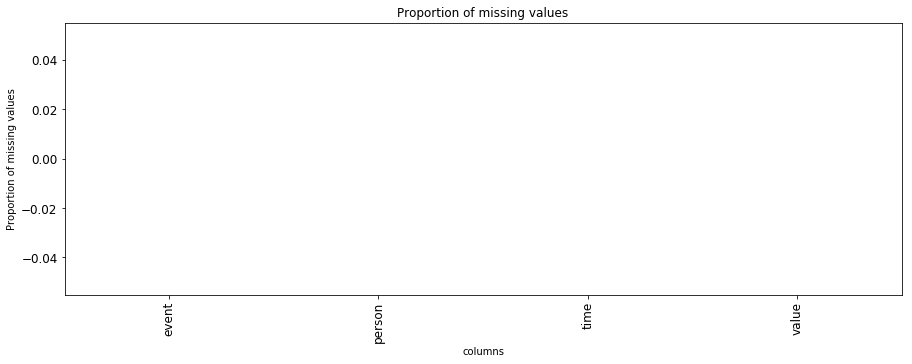

In [107]:
fig,axes=plt.subplots(1,1,figsize=(15,5))
(transcript.isnull().sum()/transcript.shape[0]*100).plot(kind='bar',color='orange');
plt.xticks(fontsize=12),plt.yticks(fontsize=12);
plt.title('Proportion of missing values')
plt.xlabel('columns')
plt.ylabel('Proportion of missing values');

# 3. Data Preparation

### 3.1 Cleanning Data

 First of all,  since the data is already collected and gather we need to prepare and cleanning data data 

In [108]:
portfolio_new = portfolio

In [109]:
for i in ['email', 'mobile', 'social', 'web']:
    portfolio_new[i] = portfolio_new['channels'].apply(lambda x: 1 if i in x else 0)  

In [110]:
portfolio_new.head()

,channels,difficulty,duration,id,offer_type,reward,email,mobile,social,web
0,"[email, mobile, social]",10,7,ae264e3637204a6fb9bb56bc8210ddfd,bogo,10,1,1,1,0
1,"[web, email, mobile, social]",10,5,4d5c57ea9a6940dd891ad53e9dbe8da0,bogo,10,1,1,1,1
2,"[web, email, mobile]",0,4,3f207df678b143eea3cee63160fa8bed,informational,0,1,1,0,1
3,"[web, email, mobile]",5,7,9b98b8c7a33c4b65b9aebfe6a799e6d9,bogo,5,1,1,0,1
4,"[web, email]",20,10,0b1e1539f2cc45b7b9fa7c272da2e1d7,discount,5,1,0,0,1


In [111]:
for j in ['bogo', 'informational', 'discount']:
    portfolio_new[j] = portfolio_new['offer_type'].apply(lambda x: 1 if j in x else 0)  

In [112]:
portfolio_new.drop(columns=['channels','offer_type'], inplace=True)

In [113]:
portfolio_new.duplicated().sum()

0

In [114]:
portfolio_new.head()

,difficulty,duration,id,reward,email,mobile,social,web,bogo,informational,discount
0,10,7,ae264e3637204a6fb9bb56bc8210ddfd,10,1,1,1,0,1,0,0
1,10,5,4d5c57ea9a6940dd891ad53e9dbe8da0,10,1,1,1,1,1,0,0
2,0,4,3f207df678b143eea3cee63160fa8bed,0,1,1,0,1,0,1,0
3,5,7,9b98b8c7a33c4b65b9aebfe6a799e6d9,5,1,1,0,1,1,0,0
4,20,10,0b1e1539f2cc45b7b9fa7c272da2e1d7,5,1,0,0,1,0,0,1


In [122]:
profile_new = profile

In [123]:
profile_new.head(1)

,age,became_member_on,gender,id,income
0,118,20170212,None,68be06ca386d4c31939f3a4f0e3dd783,NaN


In [124]:
profile_new.isnull().sum(axis=0)

age                    0
became_member_on       0
gender              2175
id                     0
income              2175
dtype: int64

In [125]:
profile_new.drop(profile_new[profile_new['gender'].isnull()].index)
profile_new.drop(profile_new[profile_new['income'].isnull()].index)
profile_new.age.replace(118, np.nan, inplace=True)

In [126]:
profile_new.head()

,age,became_member_on,gender,id,income
0,NaN,20170212,None,68be06ca386d4c31939f3a4f0e3dd783,NaN
1,55.0,20170715,F,0610b486422d4921ae7d2bf64640c50b,112000.0
2,NaN,20180712,None,38fe809add3b4fcf9315a9694bb96ff5,NaN
3,75.0,20170509,F,78afa995795e4d85b5d9ceeca43f5fef,100000.0
4,NaN,20170804,None,a03223e636434f42ac4c3df47e8bac43,NaN


In [127]:
profile_new['became_member_on'] =  pd.to_datetime(profile_new['became_member_on'], format = '%Y%m%d')


In [128]:
profile_new['year_regester']  = profile_new.became_member_on.dt.year

In [129]:
profile_new.head(1)

,age,became_member_on,gender,id,income,year_regester
0,NaN,2017-02-12,None,68be06ca386d4c31939f3a4f0e3dd783,NaN,2017


In [157]:
transcript_new = transcript

In [158]:
#transcript_new['value_type'] = transcript_new['value'].apply(lambda x: list(x.keys())[0])  
#transcript_new['value'] = transcript_new['value'].apply(lambda x: list(x.values())[0])  
#transcript_new['time'] = transcript_new['time'].apply(lambda x: int(x))

transcript.head()

,event,person,time,value
0,offer received,78afa995795e4d85b5d9ceeca43f5fef,0,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'}
1,offer received,a03223e636434f42ac4c3df47e8bac43,0,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}
2,offer received,e2127556f4f64592b11af22de27a7932,0,{'offer id': '2906b810c7d4411798c6938adc9daaa5'}
3,offer received,8ec6ce2a7e7949b1bf142def7d0e0586,0,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'}
4,offer received,68617ca6246f4fbc85e91a2a49552598,0,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'}


In [159]:
transcript_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306534 entries, 0 to 306533
Data columns (total 4 columns):
event     306534 non-null object
person    306534 non-null object
time      306534 non-null int64
value     306534 non-null object
dtypes: int64(1), object(3)
memory usage: 9.4+ MB


In [160]:
transcript_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306534 entries, 0 to 306533
Data columns (total 4 columns):
event     306534 non-null object
person    306534 non-null object
time      306534 non-null int64
value     306534 non-null object
dtypes: int64(1), object(3)
memory usage: 9.4+ MB


In [161]:
transcript_new = transcript_new[transcript_new['person'].isin(profile['id'])]
transcript_new['key'] = transcript_new['value'].apply(lambda x: list(x.keys())[0])
transcript_new['amount'] = transcript_new['value'].apply(lambda x: list(x.values())[0])
transcript_new['offer_id'] = transcript_new['amount']

transcript_new['amount'] = np.where(transcript_new['key'] == 'offer id', np.NaN, transcript_new['amount'])
transcript_new['amount'] = np.where(transcript_new['key'] == 'offer_id', np.NaN, transcript_new['amount'])
transcript_new['offer_id'] = np.where(transcript_new['key'] == 'amount', np.NaN, transcript_new['offer_id'])

transcript_new['amount'].astype(np.float64)
transcript_new.drop(['value', 'key'], axis=1, inplace=True)


In [162]:
print('before remove duplicates  ', transcript_new.duplicated().sum())
transcript_new.drop_duplicates(inplace=True)
transcript_new.reset_index(drop=True, inplace=True)
print('after remove duplicates  ', transcript_new.duplicated().sum())

before remove duplicates   397
after remove duplicates   0


In [163]:
transcript_new['received'] = transcript_new.event.apply(lambda x: 1 if x == 'offer received' else 0)
transcript_new['completed'] = transcript_new.event.apply(lambda x: 1 if x == 'offer completed' else 0)
transcript_new['viewed'] = transcript_new.event.apply(lambda x: 1 if x == 'offer viewed' else 0)

In [164]:
transcript_new

,event,person,time,amount,offer_id,received,completed,viewed
0,offer received,78afa995795e4d85b5d9ceeca43f5fef,0,NaN,9b98b8c7a33c4b65b9aebfe6a799e6d9,1,0,0
1,offer received,a03223e636434f42ac4c3df47e8bac43,0,NaN,0b1e1539f2cc45b7b9fa7c272da2e1d7,1,0,0
2,offer received,e2127556f4f64592b11af22de27a7932,0,NaN,2906b810c7d4411798c6938adc9daaa5,1,0,0
3,offer received,8ec6ce2a7e7949b1bf142def7d0e0586,0,NaN,fafdcd668e3743c1bb461111dcafc2a4,1,0,0
4,offer received,68617ca6246f4fbc85e91a2a49552598,0,NaN,4d5c57ea9a6940dd891ad53e9dbe8da0,1,0,0
5,offer received,389bc3fa690240e798340f5a15918d5c,0,NaN,f19421c1d4aa40978ebb69ca19b0e20d,1,0,0
6,offer received,c4863c7985cf408faee930f111475da3,0,NaN,2298d6c36e964ae4a3e7e9706d1fb8c2,1,0,0
7,offer received,2eeac8d8feae4a8cad5a6af0499a211d,0,NaN,3f207df678b143eea3cee63160fa8bed,1,0,0
8,offer received,aa4862eba776480b8bb9c68455b8c2e1,0,NaN,0b1e1539f2cc45b7b9fa7c272da2e1d7,1,0,0
9,offer received,31dda685af34476cad5bc968bdb01c53,0,NaN,0b1e1539f2cc45b7b9fa7c272da2e1d7,1,0,0


In [171]:
transactions = transcript_new[transcript_new.event=='transaction'].copy()
transactions.drop(columns=['offer_id', 'event','received', 'completed','viewed'], inplace=True)
(transactions.head())


,person,time,amount
12654,02c083884c7d45b39cc68e1314fec56c,0,0.83
12657,9fa9ae8f57894cc9a3b8a9bbe0fc1b2f,0,34.56
12659,54890f68699049c2a04d415abc25e717,0,13.23
12670,b2f1cd155b864803ad8334cdf13c4bd2,0,19.51
12671,fe97aa22dd3e48c8b143116a8403dd52,0,18.97


In [172]:
others = transcript_new[transcript_new.event!='transaction'].copy()
others.head()

,event,person,time,amount,offer_id,received,completed,viewed
0,offer received,78afa995795e4d85b5d9ceeca43f5fef,0,NaN,9b98b8c7a33c4b65b9aebfe6a799e6d9,1,0,0
1,offer received,a03223e636434f42ac4c3df47e8bac43,0,NaN,0b1e1539f2cc45b7b9fa7c272da2e1d7,1,0,0
2,offer received,e2127556f4f64592b11af22de27a7932,0,NaN,2906b810c7d4411798c6938adc9daaa5,1,0,0
3,offer received,8ec6ce2a7e7949b1bf142def7d0e0586,0,NaN,fafdcd668e3743c1bb461111dcafc2a4,1,0,0
4,offer received,68617ca6246f4fbc85e91a2a49552598,0,NaN,4d5c57ea9a6940dd891ad53e9dbe8da0,1,0,0


In [176]:
df = []
users_id = transcript_new['person'].unique() 
# loop through all customer ids in offers_df


In [177]:
for i in range(len(users_id)):

    usr_id = users_id[i]

    user = profile_new[profile_new['id']==usr_id]

    others_data = others[others['person']==usr_id]

    transaction_data = transactions[transactions['person']==usr_id]

  
    received_data = others_data[transcript_new['received'] == 1]
    completed_data = others_data[transcript_new['completed'] == 1]
    viewed_data = others_data[transcript_new['viewed'] == 1]

    lst = []
    for i in range(received_data.shape[0]):

        offer_id = received_data.iloc[i]['offer_id']

        offer_idx = portfolio_new.loc[portfolio_new['id'] == offer_id]
        days = offer_idx['duration'].values[0]

        start = received_data.iloc[i]['time']
        end = start + days

        completed_days = np.logical_and(completed_data['time'] >= start, completed_data['time'] <= end)

        viewed_days = np.logical_and(viewed_data['time'] >= start, viewed_data['time'] <=end)

        successful = completed_days.sum() > 0 and viewed_days.sum() > 0

        transaction_days = np.logical_and(transaction_data['time'] >= start, transaction_data['time'] <= end)

        transaction_data = transaction_data[transaction_days]

        total = transaction_data['amount'].sum()

        col_data = {'offer_id': offer_id,'person': usr_id, 'time': start, 'total': total, 'successful': int(successful),}
        col_data.update(offer_idx.iloc[0,0:].to_dict())
        col_data.update(user.iloc[0,:].to_dict())
        lst.append(col_data)
    
    df.extend(lst)

df_all = pd.DataFrame(df)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  del sys.path[0]
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [178]:
df_all

,age,became_member_on,bogo,difficulty,discount,duration,email,gender,id,income,...,mobile,offer_id,person,reward,social,successful,time,total,web,year_regester
0,75.0,2017-05-09,1,5,0,7,1,F,78afa995795e4d85b5d9ceeca43f5fef,100000.0,...,1,9b98b8c7a33c4b65b9aebfe6a799e6d9,78afa995795e4d85b5d9ceeca43f5fef,5,0,0,0,False,1,2017
1,75.0,2017-05-09,0,0,0,3,1,F,78afa995795e4d85b5d9ceeca43f5fef,100000.0,...,1,5a8bc65990b245e5a138643cd4eb9837,78afa995795e4d85b5d9ceeca43f5fef,0,1,0,168,False,0,2017
2,75.0,2017-05-09,1,10,0,7,1,F,78afa995795e4d85b5d9ceeca43f5fef,100000.0,...,1,ae264e3637204a6fb9bb56bc8210ddfd,78afa995795e4d85b5d9ceeca43f5fef,10,1,0,408,False,0,2017
3,75.0,2017-05-09,1,5,0,5,1,F,78afa995795e4d85b5d9ceeca43f5fef,100000.0,...,1,f19421c1d4aa40978ebb69ca19b0e20d,78afa995795e4d85b5d9ceeca43f5fef,5,1,0,504,False,1,2017
4,NaN,2017-08-04,0,20,1,10,1,None,a03223e636434f42ac4c3df47e8bac43,NaN,...,0,0b1e1539f2cc45b7b9fa7c272da2e1d7,a03223e636434f42ac4c3df47e8bac43,5,0,0,0,False,1,2017
5,NaN,2017-08-04,0,0,0,4,1,None,a03223e636434f42ac4c3df47e8bac43,NaN,...,1,3f207df678b143eea3cee63160fa8bed,a03223e636434f42ac4c3df47e8bac43,0,0,0,336,False,1,2017
6,NaN,2017-08-04,0,0,0,3,1,None,a03223e636434f42ac4c3df47e8bac43,NaN,...,1,5a8bc65990b245e5a138643cd4eb9837,a03223e636434f42ac4c3df47e8bac43,0,1,0,408,False,0,2017
7,NaN,2017-08-04,0,20,1,10,1,None,a03223e636434f42ac4c3df47e8bac43,NaN,...,0,0b1e1539f2cc45b7b9fa7c272da2e1d7,a03223e636434f42ac4c3df47e8bac43,5,0,0,504,False,1,2017
8,NaN,2017-08-04,0,20,1,10,1,None,a03223e636434f42ac4c3df47e8bac43,NaN,...,0,0b1e1539f2cc45b7b9fa7c272da2e1d7,a03223e636434f42ac4c3df47e8bac43,5,0,0,576,False,1,2017
9,68.0,2018-04-26,0,10,1,7,1,M,e2127556f4f64592b11af22de27a7932,70000.0,...,1,2906b810c7d4411798c6938adc9daaa5,e2127556f4f64592b11af22de27a7932,2,0,0,0,False,1,2018


In [179]:
df_all.to_csv('data_all.csv', index=False)

# 4. Exploration Analysis and Visualization

### $\color{red}{\text{ Question I : What gender are most of Starbucks customers?}}$ 

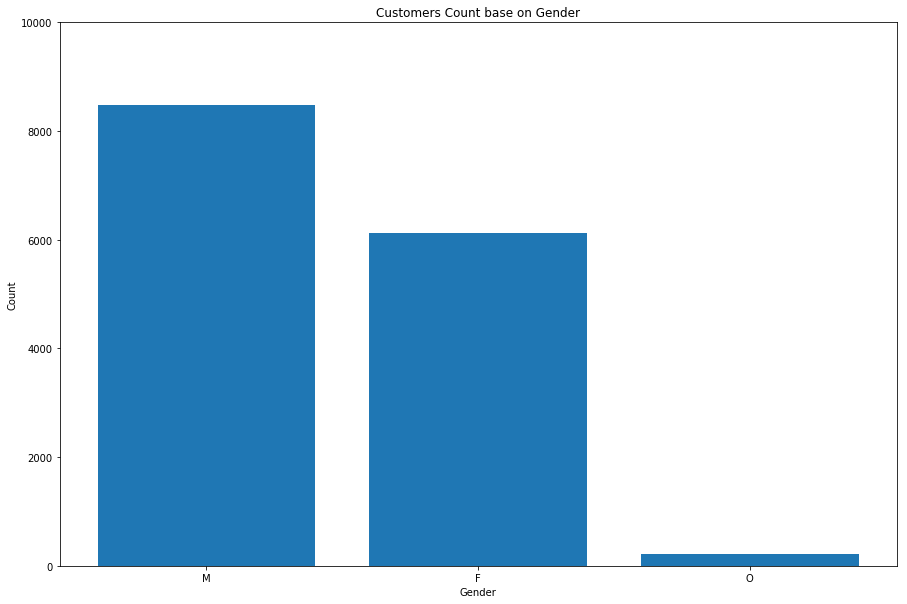

In [180]:
gender = pd.DataFrame(profile_new.gender.value_counts())
plt.figure(figsize=(15,10))
plt.bar(range(gender.shape[0]), gender.values.reshape(1, -1)[0]);
plt.xticks(range(gender.shape[0]), gender.index);
plt.ylim(0, 10000);
plt.xlabel('Gender');
plt.ylabel('Count');
plt.title('Customers Count base on Gender');


#### We can recognize from the graph the most customers are male so we can advise the marketing department to do more adverts for female

### $\color{red}{\text{ Question II : Based on income of customers who have highest income?}}$ 

In [181]:
profile_new.groupby('gender')['income'].mean()

gender
F    71306.412139
M    61194.601603
O    63287.735849
Name: income, dtype: float64

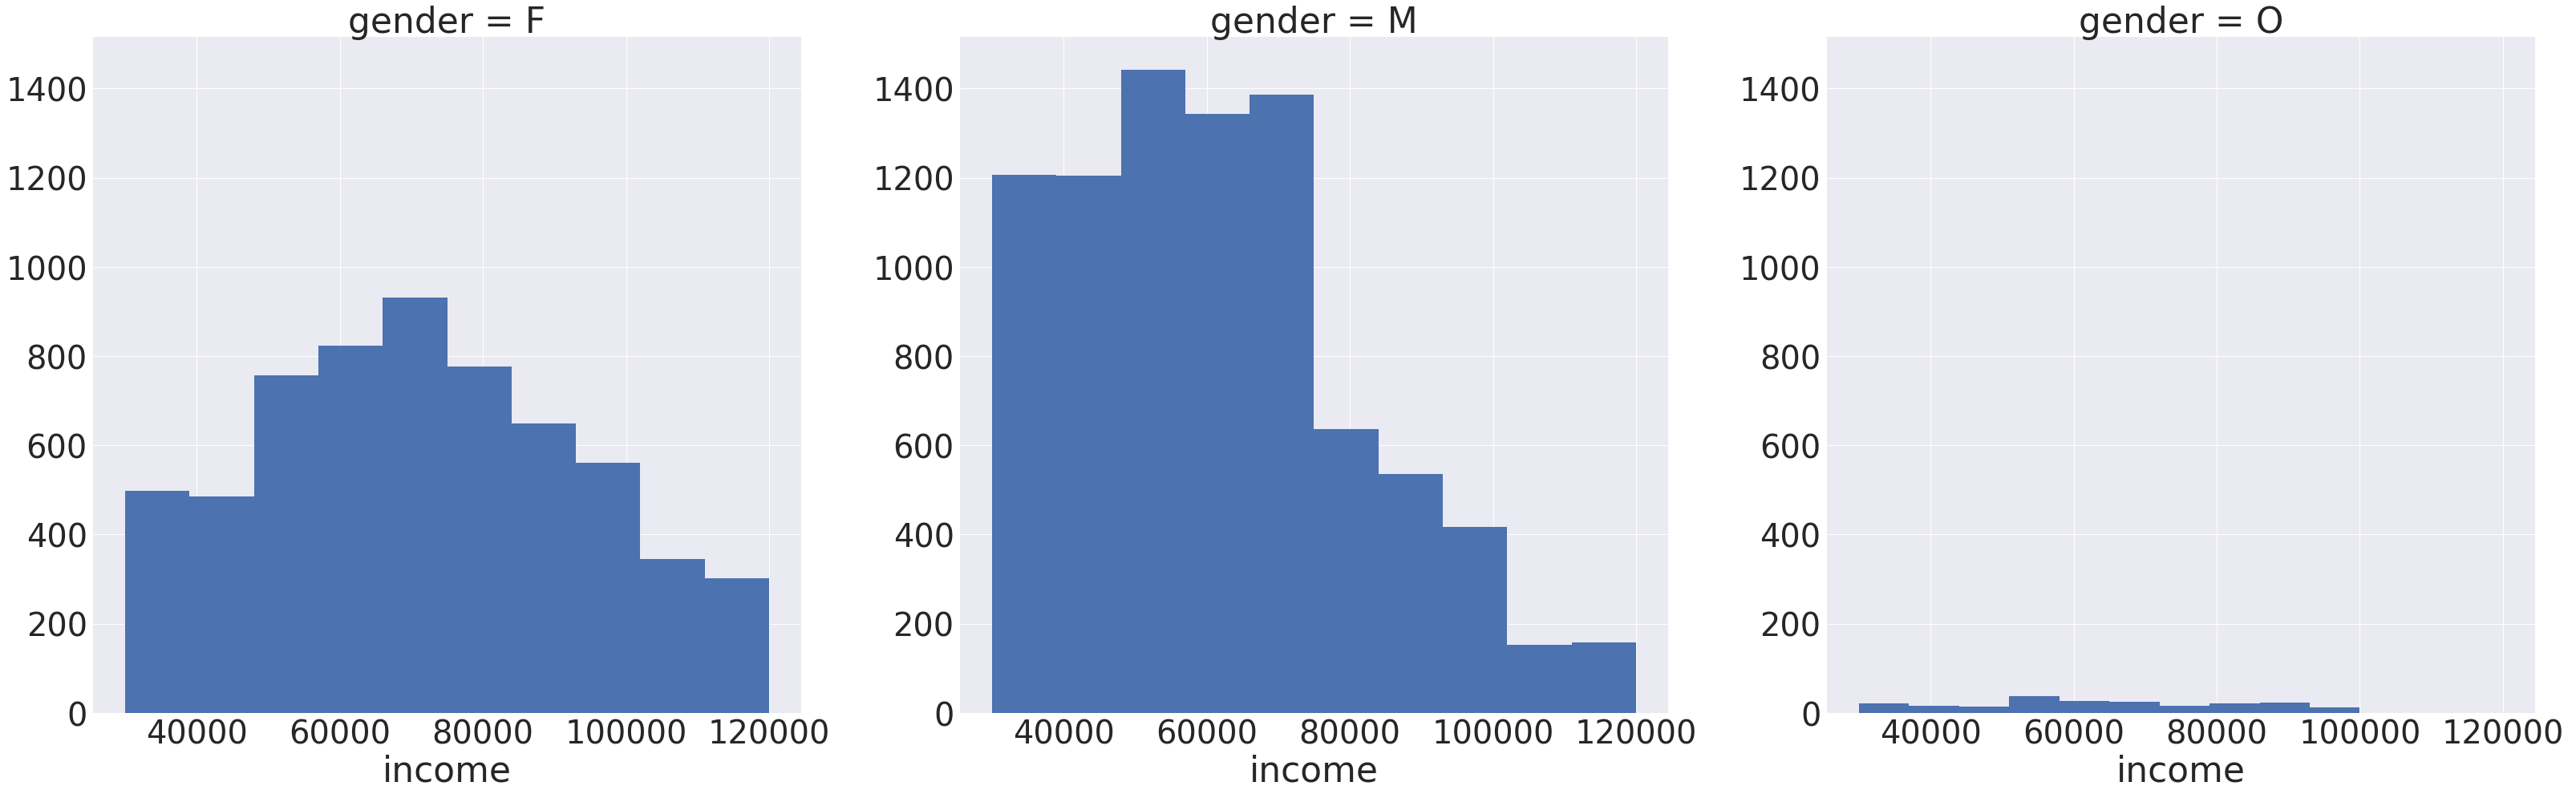

In [182]:
g = sns.set(font_scale=4)
g = sns.FacetGrid(data = profile_new, col = 'gender', size=15)
g.map(plt.hist, 'income')
g.add_legend()

Text(0.5,1,'Gender vs Average Income')

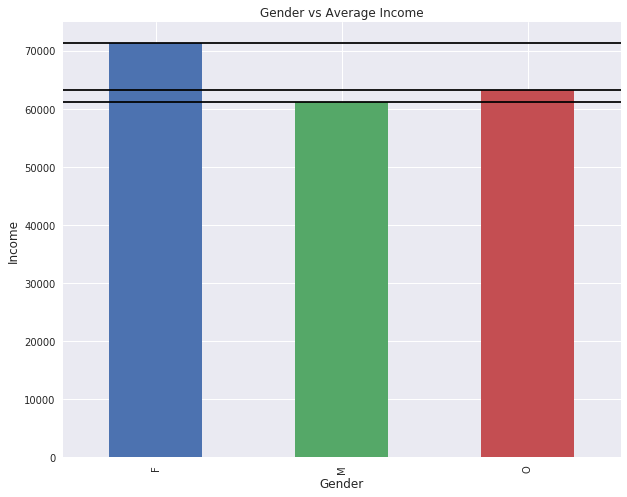

In [183]:
g = sns.set(font_scale=1)
gender_income = profile.groupby('gender', as_index=False).agg({'income':'mean'})
gender_income.plot(kind = 'bar', x = 'gender', y = 'income', legend=False, figsize=(10,8))
plt.hlines(profile_new.groupby('gender')['income'].mean(), -100 , 1000)
plt.ylabel('Income', fontsize = 12)
plt.xlabel('Gender', fontsize = 12)
plt.title('Gender vs Average Income') 

We can see the the average of incom for women is hiehest then other gender

### $\color{red}{\text{  Forecasting the membership based on gender}}$ 

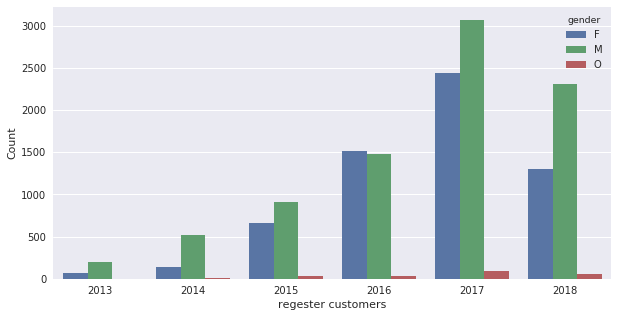

In [184]:
g = sns.set(font_scale=1)
group_date_gender = profile_new.groupby(['year_regester', 'gender']).size()
group_date_gender = group_date_gender.reset_index()
group_date_gender.columns = ['year_regester', 'gender', 'count'] 
plt.figure(figsize=(10, 5))
sns.barplot(x='year_regester', y='count', hue='gender', data=group_date_gender)
plt.xlabel('regester customers')
plt.ylabel('Count');

### $\color{red}{\text{  Avarege of customer age}}$ 

In [185]:
profile_new.age.describe()

count    14825.000000
mean        54.393524
std         17.383705
min         18.000000
25%         42.000000
50%         55.000000
75%         66.000000
max        101.000000
Name: age, dtype: float64

we can recognize the average of age is 54 and youngest age is 18 and 101 is oldest customers

### $\color{red}{\text{Analyzing the  percent of customers base on year of regester as a member}}$  

In [186]:
calculate_percent =  profile_new.year_regester.value_counts() / 100
calculate_percent = pd.DataFrame(calculate_percent) 
calculate_percent.head()


,year_regester
2017,64.69
2018,41.98
2016,35.26
2015,18.30
2014,6.91


### $\color{red}{\text{Most channels Used to communicate with on customers}}$   

In [187]:
df_all.web.value_counts()

1    61001
0    15276
Name: web, dtype: int64

In [188]:
df_all.email.value_counts()

1    76277
Name: email, dtype: int64

In [189]:
df_all.social.value_counts()

1    45683
0    30594
Name: social, dtype: int64

In [190]:
df_all.mobile.value_counts()

1    68609
0     7668
Name: mobile, dtype: int64

### from the celles above we can see the email is most channel is used to communicate with customers

### $\color{red}{\text{Number of transactions based on events}}$   

In [196]:
transcript_new[['event', 'person']].groupby(by=["event"]).agg({'person':'count'}).sort_values(by='person', ascending=False).reset_index()

,event,person
0,transaction,138953
1,offer received,76277
2,offer viewed,57725
3,offer completed,33182


Text(0,0.5,'Type of event')

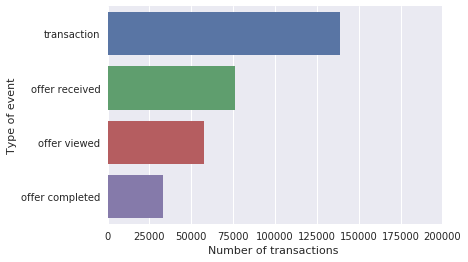

In [197]:
transcript_event = transcript_new[['event', 'person']].groupby(by=["event"]).agg({'person':'count'}).sort_values(by='person', ascending=False).reset_index()
ax = sns.barplot(x="person", y="event", data=transcript_event)
plt.xlim(0, 200000)
plt.xlabel("Number of transactions ")
plt.ylabel("Type of event")


## 5. Data Modeling:

In [208]:
df_all.columns

Index(['age', 'became_member_on', 'bogo', 'difficulty', 'discount', 'duration',
       'email', 'gender', 'id', 'income', 'informational', 'mobile',
       'offer_id', 'person', 'reward', 'social', 'successful', 'time', 'total',
       'web', 'year_regester'],
      dtype='object')

In [224]:
df_all.drop(columns=['time', 'person', 'email', 'informational', 'became_member_on'])

,age,bogo,difficulty,discount,duration,gender,id,income,mobile,offer_id,reward,social,successful,total,web,year_regester
0,75.0,1,5,0,7,F,78afa995795e4d85b5d9ceeca43f5fef,100000.0,1,9b98b8c7a33c4b65b9aebfe6a799e6d9,5,0,0,False,1,2017
1,75.0,0,0,0,3,F,78afa995795e4d85b5d9ceeca43f5fef,100000.0,1,5a8bc65990b245e5a138643cd4eb9837,0,1,0,False,0,2017
2,75.0,1,10,0,7,F,78afa995795e4d85b5d9ceeca43f5fef,100000.0,1,ae264e3637204a6fb9bb56bc8210ddfd,10,1,0,False,0,2017
3,75.0,1,5,0,5,F,78afa995795e4d85b5d9ceeca43f5fef,100000.0,1,f19421c1d4aa40978ebb69ca19b0e20d,5,1,0,False,1,2017
4,NaN,0,20,1,10,None,a03223e636434f42ac4c3df47e8bac43,NaN,0,0b1e1539f2cc45b7b9fa7c272da2e1d7,5,0,0,False,1,2017
5,NaN,0,0,0,4,None,a03223e636434f42ac4c3df47e8bac43,NaN,1,3f207df678b143eea3cee63160fa8bed,0,0,0,False,1,2017
6,NaN,0,0,0,3,None,a03223e636434f42ac4c3df47e8bac43,NaN,1,5a8bc65990b245e5a138643cd4eb9837,0,1,0,False,0,2017
7,NaN,0,20,1,10,None,a03223e636434f42ac4c3df47e8bac43,NaN,0,0b1e1539f2cc45b7b9fa7c272da2e1d7,5,0,0,False,1,2017
8,NaN,0,20,1,10,None,a03223e636434f42ac4c3df47e8bac43,NaN,0,0b1e1539f2cc45b7b9fa7c272da2e1d7,5,0,0,False,1,2017
9,68.0,0,10,1,7,M,e2127556f4f64592b11af22de27a7932,70000.0,1,2906b810c7d4411798c6938adc9daaa5,2,0,0,False,1,2018


In [236]:
df_all['gender'] = df_all['gender'].apply(lambda x: 1 if x == 'M' else 0)

In [237]:
col = [ 'offer_id', 'total','successful', 'difficulty', 'duration', 'reward', 
       'bogo', 'discount', 'mobile', 'social', 'web', 'gender', 
       'income', 'age', 'year_regester','id']
df_final = df_all[col]

In [262]:
df_final=df_final.dropna()

In [263]:
x = df_final.loc[:, df_final.columns != 'successful'].values  
y = df_final.loc[:, df_final.columns == 'successful'].values
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

offerID_train = X_train[:, 0]
total_train = X_train[:, 1] 
X_train = X_train[:, 2:14].astype('float64')

offerID_test = X_test[:, 0]
total_test = X_test[:, 1] 
X_test = X_test[:, 2:14].astype('float64')

y_train = y_train.ravel()
y_test = y_test.ravel()

In [264]:
df_final.isnull().sum()

offer_id         0
total            0
successful       0
difficulty       0
duration         0
reward           0
bogo             0
discount         0
mobile           0
social           0
web              0
gender           0
income           0
age              0
year_regester    0
id               0
dtype: int64

###  Application of Random Forest  Model

In [271]:
est_rfc = RandomForestClassifier(random_state=42) 
estimators = [10, 50, 100, 150, 200, 250, 300] 
max_depth = [int(x) for x in np.arange(3, 11)]
max_depth.append(None) 
min_samples_split = [2, 5, 10] 
min_samples_leaf = [1, 2, 4]

# Create the random grid
grid_params = {'n_estimators': estimators, 'max_depth': max_depth,
               'min_samples_split': min_samples_split,'min_samples_leaf': min_samples_leaf}
 
model = RandomizedSearchCV(estimator = est_rfc,param_distributions = grid_params, scoring=scorer, n_iter = 100,
                               cv = 3,verbose=2,random_state=42, n_jobs = 3)
model.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] n_estimators=50, min_samples_split=10, min_samples_leaf=2, max_depth=None 
[CV] n_estimators=50, min_samples_split=10, min_samples_leaf=2, max_depth=None 
[CV] n_estimators=50, min_samples_split=10, min_samples_leaf=2, max_depth=None 


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  n_estimators=50, min_samples_split=10, min_samples_leaf=2, max_depth=None, total=   4.2s
[CV] n_estimators=10, min_samples_split=2, min_samples_leaf=2, max_depth=None 
[CV]  n_estimators=50, min_samples_split=10, min_samples_leaf=2, max_depth=None, total=   4.2s
[CV] n_estimators=10, min_samples_split=2, min_samples_leaf=2, max_depth=None 
[CV]  n_estimators=50, min_samples_split=10, min_samples_leaf=2, max_depth=None, total=   4.2s
[CV] n_estimators=10, min_samples_split=2, min_samples_leaf=2, max_depth=None 
[CV]  n_estimators=10, min_samples_split=2, min_samples_leaf=2, max_depth=None, total=   0.8s
[CV]  n_estimators=10, min_samples_split=2, min_samples_leaf=2, max_depth=None, total=   0.9s
[CV] n_estimators=150, min_samples_split=2, min_samples_leaf=4, max_depth=6 
[CV] n_estimators=150, min_samples_split=2, min_samples_leaf=4, max_depth=6 
[CV]  n_estimators=10, min_samples_split=2, min_samples_leaf=2, max_depth=None, total=   0.8s
[CV] n_estimators=150, min_samples_split=2

/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  n_estimators=150, min_samples_split=2, min_samples_leaf=4, max_depth=6, total=   7.9s
[CV] n_estimators=50, min_samples_split=2, min_samples_leaf=2, max_depth=None 
[CV]  n_estimators=150, min_samples_split=2, min_samples_leaf=4, max_depth=6, total=   8.0s
[CV] n_estimators=50, min_samples_split=2, min_samples_leaf=2, max_depth=None 
[CV]  n_estimators=150, min_samples_split=2, min_samples_leaf=4, max_depth=6, total=   8.1s
[CV] n_estimators=50, min_samples_split=2, min_samples_leaf=2, max_depth=None 
[CV]  n_estimators=50, min_samples_split=2, min_samples_leaf=2, max_depth=None, total=   4.2s
[CV] n_estimators=10, min_samples_split=5, min_samples_leaf=4, max_depth=10 
[CV]  n_estimators=50, min_samples_split=2, min_samples_leaf=2, max_depth=None, total=   4.2s
[CV] n_estimators=10, min_samples_split=5, min_samples_leaf=4, max_depth=10 
[CV]  n_estimators=50, min_samples_split=2, min_samples_leaf=2, max_depth=None, total=   4.1s
[CV] n_estimators=10, min_samples_split=5, min_samp

/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  n_estimators=10, min_samples_split=5, min_samples_leaf=4, max_depth=10, total=   0.7s
[CV]  n_estimators=10, min_samples_split=5, min_samples_leaf=4, max_depth=10, total=   0.7s
[CV] n_estimators=150, min_samples_split=2, min_samples_leaf=1, max_depth=8 
[CV] n_estimators=150, min_samples_split=2, min_samples_leaf=1, max_depth=8 
[CV]  n_estimators=10, min_samples_split=5, min_samples_leaf=4, max_depth=10, total=   0.7s
[CV] n_estimators=150, min_samples_split=2, min_samples_leaf=1, max_depth=8 


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  n_estimators=150, min_samples_split=2, min_samples_leaf=1, max_depth=8, total=   9.0s
[CV] n_estimators=100, min_samples_split=10, min_samples_leaf=4, max_depth=6 
[CV]  n_estimators=150, min_samples_split=2, min_samples_leaf=1, max_depth=8, total=   9.1s
[CV] n_estimators=100, min_samples_split=10, min_samples_leaf=4, max_depth=6 
[CV]  n_estimators=150, min_samples_split=2, min_samples_leaf=1, max_depth=8, total=   9.2s
[CV] n_estimators=100, min_samples_split=10, min_samples_leaf=4, max_depth=6 


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  n_estimators=100, min_samples_split=10, min_samples_leaf=4, max_depth=6, total=   5.2s
[CV] n_estimators=150, min_samples_split=10, min_samples_leaf=4, max_depth=10 
[CV]  n_estimators=100, min_samples_split=10, min_samples_leaf=4, max_depth=6, total=   5.3s
[CV] n_estimators=150, min_samples_split=10, min_samples_leaf=4, max_depth=10 
[CV]  n_estimators=100, min_samples_split=10, min_samples_leaf=4, max_depth=6, total=   5.4s
[CV] n_estimators=150, min_samples_split=10, min_samples_leaf=4, max_depth=10 


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  n_estimators=150, min_samples_split=10, min_samples_leaf=4, max_depth=10, total=  10.1s
[CV] n_estimators=50, min_samples_split=10, min_samples_leaf=1, max_depth=9 
[CV]  n_estimators=150, min_samples_split=10, min_samples_leaf=4, max_depth=10, total=  10.1s
[CV] n_estimators=50, min_samples_split=10, min_samples_leaf=1, max_depth=9 
[CV]  n_estimators=150, min_samples_split=10, min_samples_leaf=4, max_depth=10, total=  10.2s
[CV] n_estimators=50, min_samples_split=10, min_samples_leaf=1, max_depth=9 


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  n_estimators=50, min_samples_split=10, min_samples_leaf=1, max_depth=9, total=   3.5s
[CV] n_estimators=250, min_samples_split=5, min_samples_leaf=2, max_depth=6 
[CV]  n_estimators=50, min_samples_split=10, min_samples_leaf=1, max_depth=9, total=   3.5s
[CV]  n_estimators=50, min_samples_split=10, min_samples_leaf=1, max_depth=9, total=   3.5s
[CV] n_estimators=250, min_samples_split=5, min_samples_leaf=2, max_depth=6 
[CV] n_estimators=250, min_samples_split=5, min_samples_leaf=2, max_depth=6 


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  n_estimators=250, min_samples_split=5, min_samples_leaf=2, max_depth=6, total=  12.9s
[CV] n_estimators=250, min_samples_split=10, min_samples_leaf=1, max_depth=4 
[CV]  n_estimators=250, min_samples_split=5, min_samples_leaf=2, max_depth=6, total=  13.1s
[CV] n_estimators=250, min_samples_split=10, min_samples_leaf=1, max_depth=4 
[CV]  n_estimators=250, min_samples_split=5, min_samples_leaf=2, max_depth=6, total=  13.1s
[CV] n_estimators=250, min_samples_split=10, min_samples_leaf=1, max_depth=4 


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  n_estimators=250, min_samples_split=10, min_samples_leaf=1, max_depth=4, total=  10.5s
[CV] n_estimators=50, min_samples_split=2, min_samples_leaf=2, max_depth=5 
[CV]  n_estimators=250, min_samples_split=10, min_samples_leaf=1, max_depth=4, total=  10.7s
[CV] n_estimators=50, min_samples_split=2, min_samples_leaf=2, max_depth=5 
[CV]  n_estimators=250, min_samples_split=10, min_samples_leaf=1, max_depth=4, total=  10.5s
[CV] n_estimators=50, min_samples_split=2, min_samples_leaf=2, max_depth=5 


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  n_estimators=50, min_samples_split=2, min_samples_leaf=2, max_depth=5, total=   2.5s
[CV] n_estimators=150, min_samples_split=2, min_samples_leaf=1, max_depth=7 
[CV]  n_estimators=50, min_samples_split=2, min_samples_leaf=2, max_depth=5, total=   2.4s
[CV] n_estimators=150, min_samples_split=2, min_samples_leaf=1, max_depth=7 
[CV]  n_estimators=50, min_samples_split=2, min_samples_leaf=2, max_depth=5, total=   2.5s
[CV] n_estimators=150, min_samples_split=2, min_samples_leaf=1, max_depth=7 


[Parallel(n_jobs=3)]: Done  35 tasks      | elapsed:  1.4min
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  n_estimators=150, min_samples_split=2, min_samples_leaf=1, max_depth=7, total=   8.4s
[CV] n_estimators=300, min_samples_split=2, min_samples_leaf=1, max_depth=6 
[CV]  n_estimators=150, min_samples_split=2, min_samples_leaf=1, max_depth=7, total=   8.6s
[CV] n_estimators=300, min_samples_split=2, min_samples_leaf=1, max_depth=6 
[CV]  n_estimators=150, min_samples_split=2, min_samples_leaf=1, max_depth=7, total=   8.6s
[CV] n_estimators=300, min_samples_split=2, min_samples_leaf=1, max_depth=6 


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  n_estimators=300, min_samples_split=2, min_samples_leaf=1, max_depth=6, total=  15.5s
[CV] n_estimators=10, min_samples_split=2, min_samples_leaf=4, max_depth=9 
[CV]  n_estimators=300, min_samples_split=2, min_samples_leaf=1, max_depth=6, total=  15.7s
[CV] n_estimators=10, min_samples_split=2, min_samples_leaf=4, max_depth=9 
[CV]  n_estimators=300, min_samples_split=2, min_samples_leaf=1, max_depth=6, total=  15.8s
[CV] n_estimators=10, min_samples_split=2, min_samples_leaf=4, max_depth=9 


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  n_estimators=10, min_samples_split=2, min_samples_leaf=4, max_depth=9, total=   0.7s
[CV] n_estimators=300, min_samples_split=2, min_samples_leaf=2, max_depth=5 


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  n_estimators=10, min_samples_split=2, min_samples_leaf=4, max_depth=9, total=   0.7s
[CV] n_estimators=300, min_samples_split=2, min_samples_leaf=2, max_depth=5 
[CV]  n_estimators=10, min_samples_split=2, min_samples_leaf=4, max_depth=9, total=   0.7s
[CV] n_estimators=300, min_samples_split=2, min_samples_leaf=2, max_depth=5 


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  n_estimators=300, min_samples_split=2, min_samples_leaf=2, max_depth=5, total=  14.6s
[CV] n_estimators=10, min_samples_split=5, min_samples_leaf=2, max_depth=7 
[CV]  n_estimators=300, min_samples_split=2, min_samples_leaf=2, max_depth=5, total=  14.4s
[CV] n_estimators=10, min_samples_split=5, min_samples_leaf=2, max_depth=7 
[CV]  n_estimators=300, min_samples_split=2, min_samples_leaf=2, max_depth=5, total=  14.5s
[CV] n_estimators=10, min_samples_split=5, min_samples_leaf=2, max_depth=7 


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  n_estimators=10, min_samples_split=5, min_samples_leaf=2, max_depth=7, total=   0.6s
[CV] n_estimators=250, min_samples_split=5, min_samples_leaf=1, max_depth=10 
[CV]  n_estimators=10, min_samples_split=5, min_samples_leaf=2, max_depth=7, total=   0.6s
[CV] n_estimators=250, min_samples_split=5, min_samples_leaf=1, max_depth=10 
[CV]  n_estimators=10, min_samples_split=5, min_samples_leaf=2, max_depth=7, total=   0.6s
[CV] n_estimators=250, min_samples_split=5, min_samples_leaf=1, max_depth=10 


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  n_estimators=250, min_samples_split=5, min_samples_leaf=1, max_depth=10, total=  16.7s
[CV] n_estimators=100, min_samples_split=5, min_samples_leaf=2, max_depth=None 
[CV]  n_estimators=250, min_samples_split=5, min_samples_leaf=1, max_depth=10, total=  16.8s
[CV] n_estimators=100, min_samples_split=5, min_samples_leaf=2, max_depth=None 
[CV]  n_estimators=250, min_samples_split=5, min_samples_leaf=1, max_depth=10, total=  17.0s
[CV] n_estimators=100, min_samples_split=5, min_samples_leaf=2, max_depth=None 
[CV]  n_estimators=100, min_samples_split=5, min_samples_leaf=2, max_depth=None, total=   8.2s
[CV] n_estimators=250, min_samples_split=2, min_samples_leaf=1, max_depth=5 
[CV]  n_estimators=100, min_samples_split=5, min_samples_leaf=2, max_depth=None, total=   8.2s
[CV] n_estimators=250, min_samples_split=2, min_samples_leaf=1, max_depth=5 
[CV]  n_estimators=100, min_samples_split=5, min_samples_leaf=2, max_depth=None, total=   8.1s
[CV] n_estimators=250, min_samples_split=2

/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  n_estimators=250, min_samples_split=2, min_samples_leaf=1, max_depth=5, total=  11.9s
[CV] n_estimators=250, min_samples_split=10, min_samples_leaf=1, max_depth=5 
[CV]  n_estimators=250, min_samples_split=2, min_samples_leaf=1, max_depth=5, total=  11.8s
[CV] n_estimators=250, min_samples_split=10, min_samples_leaf=1, max_depth=5 
[CV]  n_estimators=250, min_samples_split=2, min_samples_leaf=1, max_depth=5, total=  11.8s
[CV] n_estimators=250, min_samples_split=10, min_samples_leaf=1, max_depth=5 


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  n_estimators=250, min_samples_split=10, min_samples_leaf=1, max_depth=5, total=  11.8s
[CV] n_estimators=50, min_samples_split=5, min_samples_leaf=4, max_depth=5 
[CV]  n_estimators=250, min_samples_split=10, min_samples_leaf=1, max_depth=5, total=  11.9s
[CV] n_estimators=50, min_samples_split=5, min_samples_leaf=4, max_depth=5 
[CV]  n_estimators=250, min_samples_split=10, min_samples_leaf=1, max_depth=5, total=  12.0s
[CV] n_estimators=50, min_samples_split=5, min_samples_leaf=4, max_depth=5 


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  n_estimators=50, min_samples_split=5, min_samples_leaf=4, max_depth=5, total=   2.5s
[CV] n_estimators=300, min_samples_split=10, min_samples_leaf=1, max_depth=6 
[CV]  n_estimators=50, min_samples_split=5, min_samples_leaf=4, max_depth=5, total=   2.5s
[CV] n_estimators=300, min_samples_split=10, min_samples_leaf=1, max_depth=6 
[CV]  n_estimators=50, min_samples_split=5, min_samples_leaf=4, max_depth=5, total=   2.4s
[CV] n_estimators=300, min_samples_split=10, min_samples_leaf=1, max_depth=6 


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  n_estimators=300, min_samples_split=10, min_samples_leaf=1, max_depth=6, total=  15.9s
[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=4, max_depth=6 
[CV]  n_estimators=300, min_samples_split=10, min_samples_leaf=1, max_depth=6, total=  16.1s
[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=4, max_depth=6 
[CV]  n_estimators=300, min_samples_split=10, min_samples_leaf=1, max_depth=6, total=  16.1s
[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=4, max_depth=6 


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  n_estimators=200, min_samples_split=10, min_samples_leaf=4, max_depth=6, total=  10.3s
[CV]  n_estimators=200, min_samples_split=10, min_samples_leaf=4, max_depth=6, total=  10.4s
[CV] n_estimators=10, min_samples_split=2, min_samples_leaf=2, max_depth=10 
[CV] n_estimators=10, min_samples_split=2, min_samples_leaf=2, max_depth=10 
[CV]  n_estimators=200, min_samples_split=10, min_samples_leaf=4, max_depth=6, total=  10.5s
[CV] n_estimators=10, min_samples_split=2, min_samples_leaf=2, max_depth=10 


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  n_estimators=10, min_samples_split=2, min_samples_leaf=2, max_depth=10, total=   0.7s
[CV]  n_estimators=10, min_samples_split=2, min_samples_leaf=2, max_depth=10, total=   0.8s
[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=2, max_depth=5 
[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=2, max_depth=5 
[CV]  n_estimators=10, min_samples_split=2, min_samples_leaf=2, max_depth=10, total=   0.7s
[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=2, max_depth=5 


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  n_estimators=200, min_samples_split=10, min_samples_leaf=2, max_depth=5, total=   9.5s
[CV] n_estimators=150, min_samples_split=5, min_samples_leaf=1, max_depth=3 
[CV]  n_estimators=200, min_samples_split=10, min_samples_leaf=2, max_depth=5, total=   9.4s
[CV] n_estimators=150, min_samples_split=5, min_samples_leaf=1, max_depth=3 
[CV]  n_estimators=200, min_samples_split=10, min_samples_leaf=2, max_depth=5, total=   9.6s
[CV] n_estimators=150, min_samples_split=5, min_samples_leaf=1, max_depth=3 


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  n_estimators=150, min_samples_split=5, min_samples_leaf=1, max_depth=3, total=   5.5s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=4, max_depth=4 
[CV]  n_estimators=150, min_samples_split=5, min_samples_leaf=1, max_depth=3, total=   5.4s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=4, max_depth=4 
[CV]  n_estimators=150, min_samples_split=5, min_samples_leaf=1, max_depth=3, total=   5.4s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=4, max_depth=4 


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=4, max_depth=4, total=   8.4s
[CV] n_estimators=10, min_samples_split=2, min_samples_leaf=2, max_depth=6 
[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=4, max_depth=4, total=   8.4s
[CV] n_estimators=10, min_samples_split=2, min_samples_leaf=2, max_depth=6 
[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=4, max_depth=4, total=   8.5s
[CV] n_estimators=10, min_samples_split=2, min_samples_leaf=2, max_depth=6 


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  n_estimators=10, min_samples_split=2, min_samples_leaf=2, max_depth=6, total=   0.6s
[CV] n_estimators=250, min_samples_split=10, min_samples_leaf=4, max_depth=6 
[CV]  n_estimators=10, min_samples_split=2, min_samples_leaf=2, max_depth=6, total=   0.6s
[CV] n_estimators=250, min_samples_split=10, min_samples_leaf=4, max_depth=6 
[CV]  n_estimators=10, min_samples_split=2, min_samples_leaf=2, max_depth=6, total=   0.5s
[CV] n_estimators=250, min_samples_split=10, min_samples_leaf=4, max_depth=6 


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  n_estimators=250, min_samples_split=10, min_samples_leaf=4, max_depth=6, total=  13.1s
[CV] n_estimators=300, min_samples_split=5, min_samples_leaf=4, max_depth=10 
[CV]  n_estimators=250, min_samples_split=10, min_samples_leaf=4, max_depth=6, total=  13.3s
[CV] n_estimators=300, min_samples_split=5, min_samples_leaf=4, max_depth=10 
[CV]  n_estimators=250, min_samples_split=10, min_samples_leaf=4, max_depth=6, total=  13.4s
[CV] n_estimators=300, min_samples_split=5, min_samples_leaf=4, max_depth=10 


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  n_estimators=300, min_samples_split=5, min_samples_leaf=4, max_depth=10, total=  20.1s
[CV] n_estimators=10, min_samples_split=5, min_samples_leaf=1, max_depth=4 
[CV]  n_estimators=300, min_samples_split=5, min_samples_leaf=4, max_depth=10, total=  20.2s
[CV] n_estimators=10, min_samples_split=5, min_samples_leaf=1, max_depth=4 
[CV]  n_estimators=300, min_samples_split=5, min_samples_leaf=4, max_depth=10, total=  20.2s
[CV] n_estimators=10, min_samples_split=5, min_samples_leaf=1, max_depth=4 


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  n_estimators=10, min_samples_split=5, min_samples_leaf=1, max_depth=4, total=   0.5s
[CV]  n_estimators=10, min_samples_split=5, min_samples_leaf=1, max_depth=4, total=   0.5s
[CV] n_estimators=300, min_samples_split=2, min_samples_leaf=1, max_depth=3 
[CV] n_estimators=300, min_samples_split=2, min_samples_leaf=1, max_depth=3 
[CV]  n_estimators=10, min_samples_split=5, min_samples_leaf=1, max_depth=4, total=   0.5s
[CV] n_estimators=300, min_samples_split=2, min_samples_leaf=1, max_depth=3 


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  n_estimators=300, min_samples_split=2, min_samples_leaf=1, max_depth=3, total=  11.0s
[CV] n_estimators=300, min_samples_split=2, min_samples_leaf=2, max_depth=4 
[CV]  n_estimators=300, min_samples_split=2, min_samples_leaf=1, max_depth=3, total=  11.0s
[CV] n_estimators=300, min_samples_split=2, min_samples_leaf=2, max_depth=4 
[CV]  n_estimators=300, min_samples_split=2, min_samples_leaf=1, max_depth=3, total=  10.9s
[CV] n_estimators=300, min_samples_split=2, min_samples_leaf=2, max_depth=4 


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  n_estimators=300, min_samples_split=2, min_samples_leaf=2, max_depth=4, total=  12.7s
[CV] n_estimators=10, min_samples_split=5, min_samples_leaf=4, max_depth=None 
[CV]  n_estimators=300, min_samples_split=2, min_samples_leaf=2, max_depth=4, total=  12.7s
[CV] n_estimators=10, min_samples_split=5, min_samples_leaf=4, max_depth=None 
[CV]  n_estimators=300, min_samples_split=2, min_samples_leaf=2, max_depth=4, total=  12.8s
[CV] n_estimators=10, min_samples_split=5, min_samples_leaf=4, max_depth=None 


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  n_estimators=10, min_samples_split=5, min_samples_leaf=4, max_depth=None, total=   0.8s
[CV] n_estimators=300, min_samples_split=5, min_samples_leaf=2, max_depth=None 
[CV]  n_estimators=10, min_samples_split=5, min_samples_leaf=4, max_depth=None, total=   0.8s
[CV]  n_estimators=10, min_samples_split=5, min_samples_leaf=4, max_depth=None, total=   0.9s
[CV] n_estimators=300, min_samples_split=5, min_samples_leaf=2, max_depth=None 
[CV] n_estimators=300, min_samples_split=5, min_samples_leaf=2, max_depth=None 
[CV]  n_estimators=300, min_samples_split=5, min_samples_leaf=2, max_depth=None, total=  24.6s
[CV] n_estimators=300, min_samples_split=5, min_samples_leaf=1, max_depth=4 
[CV]  n_estimators=300, min_samples_split=5, min_samples_leaf=2, max_depth=None, total=  24.7s
[CV] n_estimators=300, min_samples_split=5, min_samples_leaf=1, max_depth=4 
[CV]  n_estimators=300, min_samples_split=5, min_samples_leaf=2, max_depth=None, total=  24.8s
[CV] n_estimators=300, min_samples_spli

/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  n_estimators=300, min_samples_split=5, min_samples_leaf=1, max_depth=4, total=  12.7s
[CV] n_estimators=300, min_samples_split=10, min_samples_leaf=1, max_depth=4 
[CV]  n_estimators=300, min_samples_split=5, min_samples_leaf=1, max_depth=4, total=  12.9s
[CV] n_estimators=300, min_samples_split=10, min_samples_leaf=1, max_depth=4 
[CV]  n_estimators=300, min_samples_split=5, min_samples_leaf=1, max_depth=4, total=  12.8s
[CV] n_estimators=300, min_samples_split=10, min_samples_leaf=1, max_depth=4 


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  n_estimators=300, min_samples_split=10, min_samples_leaf=1, max_depth=4, total=  12.6s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=2, max_depth=5 
[CV]  n_estimators=300, min_samples_split=10, min_samples_leaf=1, max_depth=4, total=  12.7s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=2, max_depth=5 
[CV]  n_estimators=300, min_samples_split=10, min_samples_leaf=1, max_depth=4, total=  12.6s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=2, max_depth=5 


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=2, max_depth=5, total=   9.5s
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=2, max_depth=5, total=   9.5s
[CV] n_estimators=150, min_samples_split=10, min_samples_leaf=4, max_depth=6 
[CV] n_estimators=150, min_samples_split=10, min_samples_leaf=4, max_depth=6 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=2, max_depth=5, total=   9.5s
[CV] n_estimators=150, min_samples_split=10, min_samples_leaf=4, max_depth=6 


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  n_estimators=150, min_samples_split=10, min_samples_leaf=4, max_depth=6, total=   7.8s
[CV]  n_estimators=150, min_samples_split=10, min_samples_leaf=4, max_depth=6, total=   7.8s
[CV] n_estimators=10, min_samples_split=5, min_samples_leaf=1, max_depth=8 
[CV] n_estimators=10, min_samples_split=5, min_samples_leaf=1, max_depth=8 
[CV]  n_estimators=150, min_samples_split=10, min_samples_leaf=4, max_depth=6, total=   7.9s
[CV] n_estimators=10, min_samples_split=5, min_samples_leaf=1, max_depth=8 


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  n_estimators=10, min_samples_split=5, min_samples_leaf=1, max_depth=8, total=   0.7s
[CV] n_estimators=300, min_samples_split=5, min_samples_leaf=2, max_depth=8 
[CV]  n_estimators=10, min_samples_split=5, min_samples_leaf=1, max_depth=8, total=   0.7s
[CV] n_estimators=300, min_samples_split=5, min_samples_leaf=2, max_depth=8 
[CV]  n_estimators=10, min_samples_split=5, min_samples_leaf=1, max_depth=8, total=   0.7s
[CV] n_estimators=300, min_samples_split=5, min_samples_leaf=2, max_depth=8 


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  n_estimators=300, min_samples_split=5, min_samples_leaf=2, max_depth=8, total=  18.2s
[CV] n_estimators=300, min_samples_split=10, min_samples_leaf=2, max_depth=4 
[CV]  n_estimators=300, min_samples_split=5, min_samples_leaf=2, max_depth=8, total=  18.4s
[CV] n_estimators=300, min_samples_split=10, min_samples_leaf=2, max_depth=4 
[CV]  n_estimators=300, min_samples_split=5, min_samples_leaf=2, max_depth=8, total=  18.5s
[CV] n_estimators=300, min_samples_split=10, min_samples_leaf=2, max_depth=4 


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  n_estimators=300, min_samples_split=10, min_samples_leaf=2, max_depth=4, total=  12.8s
[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=2, max_depth=8 
[CV]  n_estimators=300, min_samples_split=10, min_samples_leaf=2, max_depth=4, total=  12.8s
[CV]  n_estimators=300, min_samples_split=10, min_samples_leaf=2, max_depth=4, total=  12.7s
[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=2, max_depth=8 
[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=2, max_depth=8 


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  n_estimators=200, min_samples_split=10, min_samples_leaf=2, max_depth=8, total=  12.0s
[CV] n_estimators=100, min_samples_split=5, min_samples_leaf=2, max_depth=3 
[CV]  n_estimators=200, min_samples_split=10, min_samples_leaf=2, max_depth=8, total=  12.1s
[CV] n_estimators=100, min_samples_split=5, min_samples_leaf=2, max_depth=3 
[CV]  n_estimators=200, min_samples_split=10, min_samples_leaf=2, max_depth=8, total=  12.2s
[CV] n_estimators=100, min_samples_split=5, min_samples_leaf=2, max_depth=3 


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  n_estimators=100, min_samples_split=5, min_samples_leaf=2, max_depth=3, total=   3.7s
[CV] n_estimators=300, min_samples_split=5, min_samples_leaf=4, max_depth=3 
[CV]  n_estimators=100, min_samples_split=5, min_samples_leaf=2, max_depth=3, total=   3.6s
[CV] n_estimators=300, min_samples_split=5, min_samples_leaf=4, max_depth=3 
[CV]  n_estimators=100, min_samples_split=5, min_samples_leaf=2, max_depth=3, total=   3.6s
[CV] n_estimators=300, min_samples_split=5, min_samples_leaf=4, max_depth=3 


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  n_estimators=300, min_samples_split=5, min_samples_leaf=4, max_depth=3, total=  10.9s
[CV] n_estimators=100, min_samples_split=2, min_samples_leaf=2, max_depth=10 
[CV]  n_estimators=300, min_samples_split=5, min_samples_leaf=4, max_depth=3, total=  10.9s
[CV] n_estimators=100, min_samples_split=2, min_samples_leaf=2, max_depth=10 
[CV]  n_estimators=300, min_samples_split=5, min_samples_leaf=4, max_depth=3, total=  10.9s
[CV] n_estimators=100, min_samples_split=2, min_samples_leaf=2, max_depth=10 


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  n_estimators=100, min_samples_split=2, min_samples_leaf=2, max_depth=10, total=   7.0s
[CV] n_estimators=300, min_samples_split=10, min_samples_leaf=2, max_depth=10 
[CV]  n_estimators=100, min_samples_split=2, min_samples_leaf=2, max_depth=10, total=   6.9s
[CV] n_estimators=300, min_samples_split=10, min_samples_leaf=2, max_depth=10 
[CV]  n_estimators=100, min_samples_split=2, min_samples_leaf=2, max_depth=10, total=   6.9s
[CV] n_estimators=300, min_samples_split=10, min_samples_leaf=2, max_depth=10 


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  n_estimators=300, min_samples_split=10, min_samples_leaf=2, max_depth=10, total=  20.1s
[CV] n_estimators=250, min_samples_split=5, min_samples_leaf=2, max_depth=9 
[CV]  n_estimators=300, min_samples_split=10, min_samples_leaf=2, max_depth=10, total=  20.2s
[CV] n_estimators=250, min_samples_split=5, min_samples_leaf=2, max_depth=9 
[CV]  n_estimators=300, min_samples_split=10, min_samples_leaf=2, max_depth=10, total=  20.3s
[CV] n_estimators=250, min_samples_split=5, min_samples_leaf=2, max_depth=9 


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  n_estimators=250, min_samples_split=5, min_samples_leaf=2, max_depth=9, total=  16.0s
[CV] n_estimators=150, min_samples_split=5, min_samples_leaf=1, max_depth=4 
[CV]  n_estimators=250, min_samples_split=5, min_samples_leaf=2, max_depth=9, total=  16.1s
[CV]  n_estimators=250, min_samples_split=5, min_samples_leaf=2, max_depth=9, total=  16.2s
[CV] n_estimators=150, min_samples_split=5, min_samples_leaf=1, max_depth=4 
[CV] n_estimators=150, min_samples_split=5, min_samples_leaf=1, max_depth=4 


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  n_estimators=150, min_samples_split=5, min_samples_leaf=1, max_depth=4, total=   6.4s
[CV] n_estimators=10, min_samples_split=10, min_samples_leaf=1, max_depth=5 
[CV]  n_estimators=150, min_samples_split=5, min_samples_leaf=1, max_depth=4, total=   6.4s
[CV] n_estimators=10, min_samples_split=10, min_samples_leaf=1, max_depth=5 
[CV]  n_estimators=150, min_samples_split=5, min_samples_leaf=1, max_depth=4, total=   6.5s
[CV] n_estimators=10, min_samples_split=10, min_samples_leaf=1, max_depth=5 


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  n_estimators=10, min_samples_split=10, min_samples_leaf=1, max_depth=5, total=   0.5s
[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=2, max_depth=3 
[CV]  n_estimators=10, min_samples_split=10, min_samples_leaf=1, max_depth=5, total=   0.5s
[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=2, max_depth=3 
[CV]  n_estimators=10, min_samples_split=10, min_samples_leaf=1, max_depth=5, total=   0.5s
[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=2, max_depth=3 


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  n_estimators=200, min_samples_split=10, min_samples_leaf=2, max_depth=3, total=   7.3s
[CV]  n_estimators=200, min_samples_split=10, min_samples_leaf=2, max_depth=3, total=   7.3s
[CV] n_estimators=100, min_samples_split=5, min_samples_leaf=4, max_depth=None 
[CV] n_estimators=100, min_samples_split=5, min_samples_leaf=4, max_depth=None 
[CV]  n_estimators=200, min_samples_split=10, min_samples_leaf=2, max_depth=3, total=   7.3s
[CV] n_estimators=100, min_samples_split=5, min_samples_leaf=4, max_depth=None 


[Parallel(n_jobs=3)]: Done 156 tasks      | elapsed:  8.8min
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  n_estimators=100, min_samples_split=5, min_samples_leaf=4, max_depth=None, total=   7.9s
[CV] n_estimators=100, min_samples_split=5, min_samples_leaf=1, max_depth=4 
[CV]  n_estimators=100, min_samples_split=5, min_samples_leaf=4, max_depth=None, total=   8.0s
[CV]  n_estimators=100, min_samples_split=5, min_samples_leaf=4, max_depth=None, total=   8.0s
[CV] n_estimators=100, min_samples_split=5, min_samples_leaf=1, max_depth=4 
[CV] n_estimators=100, min_samples_split=5, min_samples_leaf=1, max_depth=4 


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  n_estimators=100, min_samples_split=5, min_samples_leaf=1, max_depth=4, total=   4.5s
[CV] n_estimators=100, min_samples_split=2, min_samples_leaf=1, max_depth=3 
[CV]  n_estimators=100, min_samples_split=5, min_samples_leaf=1, max_depth=4, total=   4.6s
[CV]  n_estimators=100, min_samples_split=5, min_samples_leaf=1, max_depth=4, total=   4.5s
[CV] n_estimators=100, min_samples_split=2, min_samples_leaf=1, max_depth=3 
[CV] n_estimators=100, min_samples_split=2, min_samples_leaf=1, max_depth=3 


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  n_estimators=100, min_samples_split=2, min_samples_leaf=1, max_depth=3, total=   3.7s
[CV]  n_estimators=100, min_samples_split=2, min_samples_leaf=1, max_depth=3, total=   3.8s
[CV] n_estimators=50, min_samples_split=10, min_samples_leaf=1, max_depth=6 
[CV] n_estimators=50, min_samples_split=10, min_samples_leaf=1, max_depth=6 
[CV]  n_estimators=100, min_samples_split=2, min_samples_leaf=1, max_depth=3, total=   3.7s
[CV] n_estimators=50, min_samples_split=10, min_samples_leaf=1, max_depth=6 


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  n_estimators=50, min_samples_split=10, min_samples_leaf=1, max_depth=6, total=   2.7s
[CV] n_estimators=100, min_samples_split=5, min_samples_leaf=2, max_depth=10 
[CV]  n_estimators=50, min_samples_split=10, min_samples_leaf=1, max_depth=6, total=   2.8s
[CV]  n_estimators=50, min_samples_split=10, min_samples_leaf=1, max_depth=6, total=   2.8s
[CV] n_estimators=100, min_samples_split=5, min_samples_leaf=2, max_depth=10 
[CV] n_estimators=100, min_samples_split=5, min_samples_leaf=2, max_depth=10 


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  n_estimators=100, min_samples_split=5, min_samples_leaf=2, max_depth=10, total=   6.8s
[CV] n_estimators=100, min_samples_split=2, min_samples_leaf=1, max_depth=9 
[CV]  n_estimators=100, min_samples_split=5, min_samples_leaf=2, max_depth=10, total=   6.8s
[CV]  n_estimators=100, min_samples_split=5, min_samples_leaf=2, max_depth=10, total=   6.9s
[CV] n_estimators=100, min_samples_split=2, min_samples_leaf=1, max_depth=9 
[CV] n_estimators=100, min_samples_split=2, min_samples_leaf=1, max_depth=9 


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  n_estimators=100, min_samples_split=2, min_samples_leaf=1, max_depth=9, total=   6.4s
[CV] n_estimators=10, min_samples_split=2, min_samples_leaf=4, max_depth=6 
[CV]  n_estimators=100, min_samples_split=2, min_samples_leaf=1, max_depth=9, total=   6.5s
[CV] n_estimators=10, min_samples_split=2, min_samples_leaf=4, max_depth=6 
[CV]  n_estimators=100, min_samples_split=2, min_samples_leaf=1, max_depth=9, total=   6.6s
[CV] n_estimators=10, min_samples_split=2, min_samples_leaf=4, max_depth=6 


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  n_estimators=10, min_samples_split=2, min_samples_leaf=4, max_depth=6, total=   0.6s
[CV] n_estimators=300, min_samples_split=2, min_samples_leaf=1, max_depth=5 
[CV]  n_estimators=10, min_samples_split=2, min_samples_leaf=4, max_depth=6, total=   0.6s
[CV] n_estimators=300, min_samples_split=2, min_samples_leaf=1, max_depth=5 
[CV]  n_estimators=10, min_samples_split=2, min_samples_leaf=4, max_depth=6, total=   0.6s
[CV] n_estimators=300, min_samples_split=2, min_samples_leaf=1, max_depth=5 


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  n_estimators=300, min_samples_split=2, min_samples_leaf=1, max_depth=5, total=  14.2s
[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=1, max_depth=4 
[CV]  n_estimators=300, min_samples_split=2, min_samples_leaf=1, max_depth=5, total=  14.3s
[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=1, max_depth=4 
[CV]  n_estimators=300, min_samples_split=2, min_samples_leaf=1, max_depth=5, total=  14.4s
[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=1, max_depth=4 


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  n_estimators=200, min_samples_split=10, min_samples_leaf=1, max_depth=4, total=   8.5s
[CV] n_estimators=150, min_samples_split=10, min_samples_leaf=4, max_depth=7 
[CV]  n_estimators=200, min_samples_split=10, min_samples_leaf=1, max_depth=4, total=   8.6s
[CV] n_estimators=150, min_samples_split=10, min_samples_leaf=4, max_depth=7 
[CV]  n_estimators=200, min_samples_split=10, min_samples_leaf=1, max_depth=4, total=   8.5s
[CV] n_estimators=150, min_samples_split=10, min_samples_leaf=4, max_depth=7 


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  n_estimators=150, min_samples_split=10, min_samples_leaf=4, max_depth=7, total=   8.5s
[CV] n_estimators=10, min_samples_split=5, min_samples_leaf=4, max_depth=6 
[CV]  n_estimators=150, min_samples_split=10, min_samples_leaf=4, max_depth=7, total=   8.4s
[CV] n_estimators=10, min_samples_split=5, min_samples_leaf=4, max_depth=6 
[CV]  n_estimators=150, min_samples_split=10, min_samples_leaf=4, max_depth=7, total=   8.6s
[CV] n_estimators=10, min_samples_split=5, min_samples_leaf=4, max_depth=6 


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  n_estimators=10, min_samples_split=5, min_samples_leaf=4, max_depth=6, total=   0.6s
[CV]  n_estimators=10, min_samples_split=5, min_samples_leaf=4, max_depth=6, total=   0.6s
[CV] n_estimators=10, min_samples_split=10, min_samples_leaf=1, max_depth=8 


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV] n_estimators=10, min_samples_split=10, min_samples_leaf=1, max_depth=8 
[CV]  n_estimators=10, min_samples_split=5, min_samples_leaf=4, max_depth=6, total=   0.6s
[CV] n_estimators=10, min_samples_split=10, min_samples_leaf=1, max_depth=8 


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  n_estimators=10, min_samples_split=10, min_samples_leaf=1, max_depth=8, total=   0.6s
[CV] n_estimators=300, min_samples_split=5, min_samples_leaf=4, max_depth=4 
[CV]  n_estimators=10, min_samples_split=10, min_samples_leaf=1, max_depth=8, total=   0.7s
[CV] n_estimators=300, min_samples_split=5, min_samples_leaf=4, max_depth=4 
[CV]  n_estimators=10, min_samples_split=10, min_samples_leaf=1, max_depth=8, total=   0.6s
[CV] n_estimators=300, min_samples_split=5, min_samples_leaf=4, max_depth=4 


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  n_estimators=300, min_samples_split=5, min_samples_leaf=4, max_depth=4, total=  13.0s
[CV] n_estimators=100, min_samples_split=10, min_samples_leaf=4, max_depth=None 
[CV]  n_estimators=300, min_samples_split=5, min_samples_leaf=4, max_depth=4, total=  13.1s
[CV] n_estimators=100, min_samples_split=10, min_samples_leaf=4, max_depth=None 
[CV]  n_estimators=300, min_samples_split=5, min_samples_leaf=4, max_depth=4, total=  13.0s
[CV] n_estimators=100, min_samples_split=10, min_samples_leaf=4, max_depth=None 


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  n_estimators=100, min_samples_split=10, min_samples_leaf=4, max_depth=None, total=   8.0s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_depth=8 
[CV]  n_estimators=100, min_samples_split=10, min_samples_leaf=4, max_depth=None, total=   7.9s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_depth=8 
[CV]  n_estimators=100, min_samples_split=10, min_samples_leaf=4, max_depth=None, total=   8.0s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_depth=8 


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_depth=8, total=  12.0s
[CV] n_estimators=100, min_samples_split=2, min_samples_leaf=4, max_depth=7 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_depth=8, total=  12.1s
[CV] n_estimators=100, min_samples_split=2, min_samples_leaf=4, max_depth=7 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_depth=8, total=  12.2s
[CV] n_estimators=100, min_samples_split=2, min_samples_leaf=4, max_depth=7 


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  n_estimators=100, min_samples_split=2, min_samples_leaf=4, max_depth=7, total=   5.6s
[CV] n_estimators=10, min_samples_split=10, min_samples_leaf=1, max_depth=6 
[CV]  n_estimators=100, min_samples_split=2, min_samples_leaf=4, max_depth=7, total=   5.8s
[CV] n_estimators=10, min_samples_split=10, min_samples_leaf=1, max_depth=6 
[CV]  n_estimators=100, min_samples_split=2, min_samples_leaf=4, max_depth=7, total=   5.8s
[CV] n_estimators=10, min_samples_split=10, min_samples_leaf=1, max_depth=6 


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  n_estimators=10, min_samples_split=10, min_samples_leaf=1, max_depth=6, total=   0.6s
[CV]  n_estimators=10, min_samples_split=10, min_samples_leaf=1, max_depth=6, total=   0.6s
[CV] n_estimators=10, min_samples_split=2, min_samples_leaf=2, max_depth=4 
[CV] n_estimators=10, min_samples_split=2, min_samples_leaf=2, max_depth=4 
[CV]  n_estimators=10, min_samples_split=10, min_samples_leaf=1, max_depth=6, total=   0.6s
[CV] n_estimators=10, min_samples_split=2, min_samples_leaf=2, max_depth=4 


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  n_estimators=10, min_samples_split=2, min_samples_leaf=2, max_depth=4, total=   0.5s
[CV] n_estimators=300, min_samples_split=2, min_samples_leaf=1, max_depth=8 
[CV]  n_estimators=10, min_samples_split=2, min_samples_leaf=2, max_depth=4, total=   0.5s
[CV] n_estimators=300, min_samples_split=2, min_samples_leaf=1, max_depth=8 
[CV]  n_estimators=10, min_samples_split=2, min_samples_leaf=2, max_depth=4, total=   0.5s
[CV] n_estimators=300, min_samples_split=2, min_samples_leaf=1, max_depth=8 


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  n_estimators=300, min_samples_split=2, min_samples_leaf=1, max_depth=8, total=  18.2s
[CV] n_estimators=50, min_samples_split=10, min_samples_leaf=1, max_depth=4 
[CV]  n_estimators=300, min_samples_split=2, min_samples_leaf=1, max_depth=8, total=  18.4s
[CV] n_estimators=50, min_samples_split=10, min_samples_leaf=1, max_depth=4 
[CV]  n_estimators=300, min_samples_split=2, min_samples_leaf=1, max_depth=8, total=  18.4s
[CV] n_estimators=50, min_samples_split=10, min_samples_leaf=1, max_depth=4 


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  n_estimators=50, min_samples_split=10, min_samples_leaf=1, max_depth=4, total=   2.2s
[CV] n_estimators=50, min_samples_split=10, min_samples_leaf=2, max_depth=9 
[CV]  n_estimators=50, min_samples_split=10, min_samples_leaf=1, max_depth=4, total=   2.2s
[CV] n_estimators=50, min_samples_split=10, min_samples_leaf=2, max_depth=9 
[CV]  n_estimators=50, min_samples_split=10, min_samples_leaf=1, max_depth=4, total=   2.2s
[CV] n_estimators=50, min_samples_split=10, min_samples_leaf=2, max_depth=9 


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  n_estimators=50, min_samples_split=10, min_samples_leaf=2, max_depth=9, total=   3.3s
[CV] n_estimators=300, min_samples_split=2, min_samples_leaf=2, max_depth=9 
[CV]  n_estimators=50, min_samples_split=10, min_samples_leaf=2, max_depth=9, total=   3.3s
[CV] n_estimators=300, min_samples_split=2, min_samples_leaf=2, max_depth=9 
[CV]  n_estimators=50, min_samples_split=10, min_samples_leaf=2, max_depth=9, total=   3.3s
[CV] n_estimators=300, min_samples_split=2, min_samples_leaf=2, max_depth=9 


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  n_estimators=300, min_samples_split=2, min_samples_leaf=2, max_depth=9, total=  19.4s
[CV] n_estimators=300, min_samples_split=5, min_samples_leaf=1, max_depth=7 
[CV]  n_estimators=300, min_samples_split=2, min_samples_leaf=2, max_depth=9, total=  19.6s
[CV] n_estimators=300, min_samples_split=5, min_samples_leaf=1, max_depth=7 
[CV]  n_estimators=300, min_samples_split=2, min_samples_leaf=2, max_depth=9, total=  19.6s
[CV] n_estimators=300, min_samples_split=5, min_samples_leaf=1, max_depth=7 


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  n_estimators=300, min_samples_split=5, min_samples_leaf=1, max_depth=7, total=  16.9s
[CV] n_estimators=100, min_samples_split=10, min_samples_leaf=1, max_depth=4 
[CV]  n_estimators=300, min_samples_split=5, min_samples_leaf=1, max_depth=7, total=  17.1s
[CV] n_estimators=100, min_samples_split=10, min_samples_leaf=1, max_depth=4 
[CV]  n_estimators=300, min_samples_split=5, min_samples_leaf=1, max_depth=7, total=  16.9s
[CV] n_estimators=100, min_samples_split=10, min_samples_leaf=1, max_depth=4 


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  n_estimators=100, min_samples_split=10, min_samples_leaf=1, max_depth=4, total=   4.3s
[CV]  n_estimators=100, min_samples_split=10, min_samples_leaf=1, max_depth=4, total=   4.4s
[CV]  n_estimators=100, min_samples_split=10, min_samples_leaf=1, max_depth=4, total=   4.3s
[CV] n_estimators=100, min_samples_split=10, min_samples_leaf=2, max_depth=10 
[CV] n_estimators=100, min_samples_split=10, min_samples_leaf=2, max_depth=10 
[CV] n_estimators=100, min_samples_split=10, min_samples_leaf=2, max_depth=10 


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  n_estimators=100, min_samples_split=10, min_samples_leaf=2, max_depth=10, total=   7.0s
[CV]  n_estimators=100, min_samples_split=10, min_samples_leaf=2, max_depth=10, total=   6.9s
[CV] n_estimators=150, min_samples_split=5, min_samples_leaf=1, max_depth=8 
[CV] n_estimators=150, min_samples_split=5, min_samples_leaf=1, max_depth=8 
[CV]  n_estimators=100, min_samples_split=10, min_samples_leaf=2, max_depth=10, total=   7.0s
[CV] n_estimators=150, min_samples_split=5, min_samples_leaf=1, max_depth=8 


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  n_estimators=150, min_samples_split=5, min_samples_leaf=1, max_depth=8, total=   9.3s
[CV] n_estimators=100, min_samples_split=2, min_samples_leaf=2, max_depth=4 
[CV]  n_estimators=150, min_samples_split=5, min_samples_leaf=1, max_depth=8, total=   9.4s
[CV] n_estimators=100, min_samples_split=2, min_samples_leaf=2, max_depth=4 
[CV]  n_estimators=150, min_samples_split=5, min_samples_leaf=1, max_depth=8, total=   9.4s
[CV] n_estimators=100, min_samples_split=2, min_samples_leaf=2, max_depth=4 


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  n_estimators=100, min_samples_split=2, min_samples_leaf=2, max_depth=4, total=   4.4s
[CV] n_estimators=100, min_samples_split=5, min_samples_leaf=1, max_depth=3 
[CV]  n_estimators=100, min_samples_split=2, min_samples_leaf=2, max_depth=4, total=   4.4s
[CV] n_estimators=100, min_samples_split=5, min_samples_leaf=1, max_depth=3 
[CV]  n_estimators=100, min_samples_split=2, min_samples_leaf=2, max_depth=4, total=   4.5s
[CV] n_estimators=100, min_samples_split=5, min_samples_leaf=1, max_depth=3 


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  n_estimators=100, min_samples_split=5, min_samples_leaf=1, max_depth=3, total=   3.8s
[CV]  n_estimators=100, min_samples_split=5, min_samples_leaf=1, max_depth=3, total=   3.8s
[CV] n_estimators=50, min_samples_split=10, min_samples_leaf=1, max_depth=10 
[CV] n_estimators=50, min_samples_split=10, min_samples_leaf=1, max_depth=10 
[CV]  n_estimators=100, min_samples_split=5, min_samples_leaf=1, max_depth=3, total=   3.8s
[CV] n_estimators=50, min_samples_split=10, min_samples_leaf=1, max_depth=10 


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  n_estimators=50, min_samples_split=10, min_samples_leaf=1, max_depth=10, total=   3.5s
[CV]  n_estimators=50, min_samples_split=10, min_samples_leaf=1, max_depth=10, total=   3.5s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_depth=7 
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_depth=7 
[CV]  n_estimators=50, min_samples_split=10, min_samples_leaf=1, max_depth=10, total=   3.5s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_depth=7 


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_depth=7, total=  11.7s
[CV] n_estimators=50, min_samples_split=5, min_samples_leaf=2, max_depth=6 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_depth=7, total=  11.7s
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_depth=7, total=  11.6s
[CV] n_estimators=50, min_samples_split=5, min_samples_leaf=2, max_depth=6 
[CV] n_estimators=50, min_samples_split=5, min_samples_leaf=2, max_depth=6 


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  n_estimators=50, min_samples_split=5, min_samples_leaf=2, max_depth=6, total=   2.8s
[CV]  n_estimators=50, min_samples_split=5, min_samples_leaf=2, max_depth=6, total=   2.7s
[CV] n_estimators=150, min_samples_split=5, min_samples_leaf=4, max_depth=None 
[CV]  n_estimators=50, min_samples_split=5, min_samples_leaf=2, max_depth=6, total=   2.7s
[CV] n_estimators=150, min_samples_split=5, min_samples_leaf=4, max_depth=None 
[CV] n_estimators=150, min_samples_split=5, min_samples_leaf=4, max_depth=None 


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  n_estimators=150, min_samples_split=5, min_samples_leaf=4, max_depth=None, total=  12.0s
[CV] n_estimators=100, min_samples_split=2, min_samples_leaf=2, max_depth=7 
[CV]  n_estimators=150, min_samples_split=5, min_samples_leaf=4, max_depth=None, total=  12.2s
[CV] n_estimators=100, min_samples_split=2, min_samples_leaf=2, max_depth=7 
[CV]  n_estimators=150, min_samples_split=5, min_samples_leaf=4, max_depth=None, total=  12.2s
[CV] n_estimators=100, min_samples_split=2, min_samples_leaf=2, max_depth=7 


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  n_estimators=100, min_samples_split=2, min_samples_leaf=2, max_depth=7, total=   6.1s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_depth=None 
[CV]  n_estimators=100, min_samples_split=2, min_samples_leaf=2, max_depth=7, total=   5.9s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_depth=None 
[CV]  n_estimators=100, min_samples_split=2, min_samples_leaf=2, max_depth=7, total=   6.0s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_depth=None 
[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_depth=None, total=  16.5s
[CV] n_estimators=250, min_samples_split=10, min_samples_leaf=1, max_depth=10 
[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_depth=None, total=  16.6s
[CV] n_estimators=250, min_samples_split=10, min_samples_leaf=1, max_depth=10 
[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_depth=None, total=  16.6s
[CV] n_estimators=250, min_samples_split=

/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  n_estimators=250, min_samples_split=10, min_samples_leaf=1, max_depth=10, total=  17.6s
[CV] n_estimators=10, min_samples_split=10, min_samples_leaf=4, max_depth=None 
[CV]  n_estimators=250, min_samples_split=10, min_samples_leaf=1, max_depth=10, total=  17.8s
[CV]  n_estimators=250, min_samples_split=10, min_samples_leaf=1, max_depth=10, total=  17.7s
[CV] n_estimators=10, min_samples_split=10, min_samples_leaf=4, max_depth=None 
[CV] n_estimators=10, min_samples_split=10, min_samples_leaf=4, max_depth=None 


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  n_estimators=10, min_samples_split=10, min_samples_leaf=4, max_depth=None, total=   0.8s
[CV] n_estimators=150, min_samples_split=10, min_samples_leaf=2, max_depth=8 
[CV]  n_estimators=10, min_samples_split=10, min_samples_leaf=4, max_depth=None, total=   0.8s
[CV] n_estimators=150, min_samples_split=10, min_samples_leaf=2, max_depth=8 
[CV]  n_estimators=10, min_samples_split=10, min_samples_leaf=4, max_depth=None, total=   0.8s
[CV] n_estimators=150, min_samples_split=10, min_samples_leaf=2, max_depth=8 


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  n_estimators=150, min_samples_split=10, min_samples_leaf=2, max_depth=8, total=   9.3s
[CV]  n_estimators=150, min_samples_split=10, min_samples_leaf=2, max_depth=8, total=   9.3s
[CV] n_estimators=150, min_samples_split=10, min_samples_leaf=2, max_depth=4 
[CV]  n_estimators=150, min_samples_split=10, min_samples_leaf=2, max_depth=8, total=   9.4s
[CV] n_estimators=150, min_samples_split=10, min_samples_leaf=2, max_depth=4 
[CV] n_estimators=150, min_samples_split=10, min_samples_leaf=2, max_depth=4 


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  n_estimators=150, min_samples_split=10, min_samples_leaf=2, max_depth=4, total=   6.4s
[CV] n_estimators=10, min_samples_split=10, min_samples_leaf=1, max_depth=4 
[CV]  n_estimators=150, min_samples_split=10, min_samples_leaf=2, max_depth=4, total=   6.5s
[CV] n_estimators=10, min_samples_split=10, min_samples_leaf=1, max_depth=4 
[CV]  n_estimators=150, min_samples_split=10, min_samples_leaf=2, max_depth=4, total=   6.4s
[CV] n_estimators=10, min_samples_split=10, min_samples_leaf=1, max_depth=4 


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  n_estimators=10, min_samples_split=10, min_samples_leaf=1, max_depth=4, total=   0.5s
[CV] n_estimators=250, min_samples_split=2, min_samples_leaf=2, max_depth=9 


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  n_estimators=10, min_samples_split=10, min_samples_leaf=1, max_depth=4, total=   0.5s
[CV] n_estimators=250, min_samples_split=2, min_samples_leaf=2, max_depth=9 
[CV]  n_estimators=10, min_samples_split=10, min_samples_leaf=1, max_depth=4, total=   0.5s
[CV] n_estimators=250, min_samples_split=2, min_samples_leaf=2, max_depth=9 


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  n_estimators=250, min_samples_split=2, min_samples_leaf=2, max_depth=9, total=  16.0s
[CV]  n_estimators=250, min_samples_split=2, min_samples_leaf=2, max_depth=9, total=  15.9s
[CV] n_estimators=100, min_samples_split=5, min_samples_leaf=4, max_depth=5 
[CV] n_estimators=100, min_samples_split=5, min_samples_leaf=4, max_depth=5 
[CV]  n_estimators=250, min_samples_split=2, min_samples_leaf=2, max_depth=9, total=  16.0s
[CV] n_estimators=100, min_samples_split=5, min_samples_leaf=4, max_depth=5 


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  n_estimators=100, min_samples_split=5, min_samples_leaf=4, max_depth=5, total=   4.7s
[CV]  n_estimators=100, min_samples_split=5, min_samples_leaf=4, max_depth=5, total=   4.8s
[CV] n_estimators=50, min_samples_split=5, min_samples_leaf=2, max_depth=5 
[CV] n_estimators=50, min_samples_split=5, min_samples_leaf=2, max_depth=5 
[CV]  n_estimators=100, min_samples_split=5, min_samples_leaf=4, max_depth=5, total=   4.9s
[CV] n_estimators=50, min_samples_split=5, min_samples_leaf=2, max_depth=5 


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  n_estimators=50, min_samples_split=5, min_samples_leaf=2, max_depth=5, total=   2.5s
[CV] n_estimators=250, min_samples_split=10, min_samples_leaf=1, max_depth=7 
[CV]  n_estimators=50, min_samples_split=5, min_samples_leaf=2, max_depth=5, total=   2.4s
[CV] n_estimators=250, min_samples_split=10, min_samples_leaf=1, max_depth=7 
[CV]  n_estimators=50, min_samples_split=5, min_samples_leaf=2, max_depth=5, total=   2.5s
[CV] n_estimators=250, min_samples_split=10, min_samples_leaf=1, max_depth=7 


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  n_estimators=250, min_samples_split=10, min_samples_leaf=1, max_depth=7, total=  14.0s
[CV] n_estimators=150, min_samples_split=10, min_samples_leaf=4, max_depth=None 
[CV]  n_estimators=250, min_samples_split=10, min_samples_leaf=1, max_depth=7, total=  14.1s
[CV] n_estimators=150, min_samples_split=10, min_samples_leaf=4, max_depth=None 
[CV]  n_estimators=250, min_samples_split=10, min_samples_leaf=1, max_depth=7, total=  14.2s
[CV] n_estimators=150, min_samples_split=10, min_samples_leaf=4, max_depth=None 


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  n_estimators=150, min_samples_split=10, min_samples_leaf=4, max_depth=None, total=  11.9s
[CV] n_estimators=150, min_samples_split=10, min_samples_leaf=4, max_depth=5 
[CV]  n_estimators=150, min_samples_split=10, min_samples_leaf=4, max_depth=None, total=  11.8s
[CV] n_estimators=150, min_samples_split=10, min_samples_leaf=4, max_depth=5 
[CV]  n_estimators=150, min_samples_split=10, min_samples_leaf=4, max_depth=None, total=  11.9s
[CV] n_estimators=150, min_samples_split=10, min_samples_leaf=4, max_depth=5 


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  n_estimators=150, min_samples_split=10, min_samples_leaf=4, max_depth=5, total=   7.1s
[CV]  n_estimators=150, min_samples_split=10, min_samples_leaf=4, max_depth=5, total=   7.2s
[CV] n_estimators=250, min_samples_split=5, min_samples_leaf=1, max_depth=4 
[CV]  n_estimators=150, min_samples_split=10, min_samples_leaf=4, max_depth=5, total=   7.1s
[CV] n_estimators=250, min_samples_split=5, min_samples_leaf=1, max_depth=4 
[CV] n_estimators=250, min_samples_split=5, min_samples_leaf=1, max_depth=4 


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  n_estimators=250, min_samples_split=5, min_samples_leaf=1, max_depth=4, total=  10.5s
[CV]  n_estimators=250, min_samples_split=5, min_samples_leaf=1, max_depth=4, total=  10.5s
[CV] n_estimators=150, min_samples_split=2, min_samples_leaf=4, max_depth=9 
[CV] n_estimators=150, min_samples_split=2, min_samples_leaf=4, max_depth=9 
[CV]  n_estimators=250, min_samples_split=5, min_samples_leaf=1, max_depth=4, total=  10.6s
[CV] n_estimators=150, min_samples_split=2, min_samples_leaf=4, max_depth=9 


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  n_estimators=150, min_samples_split=2, min_samples_leaf=4, max_depth=9, total=   9.5s
[CV] n_estimators=250, min_samples_split=2, min_samples_leaf=2, max_depth=8 
[CV]  n_estimators=150, min_samples_split=2, min_samples_leaf=4, max_depth=9, total=   9.6s
[CV] n_estimators=250, min_samples_split=2, min_samples_leaf=2, max_depth=8 
[CV]  n_estimators=150, min_samples_split=2, min_samples_leaf=4, max_depth=9, total=   9.7s
[CV] n_estimators=250, min_samples_split=2, min_samples_leaf=2, max_depth=8 


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  n_estimators=250, min_samples_split=2, min_samples_leaf=2, max_depth=8, total=  15.0s
[CV]  n_estimators=250, min_samples_split=2, min_samples_leaf=2, max_depth=8, total=  15.1s
[CV]  n_estimators=250, min_samples_split=2, min_samples_leaf=2, max_depth=8, total=  15.2s


[Parallel(n_jobs=3)]: Done 300 out of 300 | elapsed: 16.1min finished


RandomizedSearchCV(cv=3, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=100, n_jobs=3,
          param_distributions={'n_estimators': [10, 50, 100, 150, 200, 250, 300], 'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn',
          scoring=make_scorer(fbeta_score, beta=0.5), verbose=2)

###   Evaluate the model

In [273]:
y_pred_rf = model.predict(X_train)

clf_accuracy = accuracy_score(y_train, y_pred_rf)
clf_f1_score = f1_score(y_train, y_pred_rf)
    
print("accuracy: %.3f" % (clf_accuracy))
print("f1-score: %.3f" % (clf_f1_score))

accuracy: 0.976
f1-score: 0.093


###  Application of Logistic Regression Model

In [265]:
scorer_logistic = make_scorer(fbeta_score, beta=0.5)
model_estim = LogisticRegression(random_state=42, solver='liblinear')
grid_params = {'penalty': ['l1', 'l2'],'C': [1.0, 0.1, 0.01]}
model = RandomizedSearchCV(
    estimator = model_estim, param_distributions = grid_params, scoring=scorer_logistic, n_iter = 6, cv = 3, verbose=2,
    random_state=42, n_jobs = 3)

# fit train data to the model
model.fit(X_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV] penalty=l1, C=1.0 ...............................................
[CV] penalty=l1, C=1.0 ...............................................
[CV] penalty=l1, C=1.0 ...............................................


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV] ................................ penalty=l1, C=1.0, total=   3.1s
[CV] penalty=l2, C=1.0 ...............................................


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV] ................................ penalty=l2, C=1.0, total=   1.0s
[CV] penalty=l2, C=1.0 ...............................................


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV] ................................ penalty=l1, C=1.0, total=   4.5s
[CV] penalty=l2, C=1.0 ...............................................


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV] ................................ penalty=l2, C=1.0, total=   1.0s
[CV] penalty=l1, C=0.1 ...............................................


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV] ................................ penalty=l2, C=1.0, total=   1.3s
[CV] penalty=l1, C=0.1 ...............................................


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV] ................................ penalty=l1, C=1.0, total=   9.7s
[CV] penalty=l1, C=0.1 ...............................................


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV] ................................ penalty=l1, C=0.1, total=   4.6s
[CV] penalty=l2, C=0.1 ...............................................


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV] ................................ penalty=l1, C=0.1, total=   5.6s
[CV] penalty=l2, C=0.1 ...............................................


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV] ................................ penalty=l2, C=0.1, total=   1.1s
[CV] penalty=l2, C=0.1 ...............................................


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV] ................................ penalty=l2, C=0.1, total=   1.2s
[CV] penalty=l1, C=0.01 ..............................................


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV] ................................ penalty=l2, C=0.1, total=   1.3s
[CV] penalty=l1, C=0.01 ..............................................
[CV] ............................... penalty=l1, C=0.01, total=   1.1s
[CV] penalty=l1, C=0.01 ..............................................


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV] ............................... penalty=l1, C=0.01, total=   1.3s
[CV] penalty=l2, C=0.01 ..............................................


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV] ............................... penalty=l1, C=0.01, total=   1.4s
[CV] penalty=l2, C=0.01 ..............................................


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV] ................................ penalty=l1, C=0.1, total=   5.0s
[CV] penalty=l2, C=0.01 ..............................................


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV] ............................... penalty=l2, C=0.01, total=   1.0s


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV] ............................... penalty=l2, C=0.01, total=   0.9s


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV] ............................... penalty=l2, C=0.01, total=   0.9s


[Parallel(n_jobs=3)]: Done  18 out of  18 | elapsed:   15.7s finished


RandomizedSearchCV(cv=3, error_score='raise',
          estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=6, n_jobs=3,
          param_distributions={'penalty': ['l1', 'l2'], 'C': [1.0, 0.1, 0.01]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn',
          scoring=make_scorer(fbeta_score, beta=0.5), verbose=2)

###   Evaluate the model

In [267]:
y_pred_rf = model.best_estimator_.predict(X_train)

clf_accuracy = accuracy_score(y_train, y_pred_rf)
clf_f1_score = f1_score(y_train, y_pred_rf)
    
print("accuracy: %.3f" % (clf_accuracy))
print("f1-score: %.3f" % (clf_f1_score))

accuracy: 0.975
f1-score: 0.000


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


### Application of Naive Forecast Models

###   Evaluate the model

In [268]:
naive_predictor_accuracy = accuracy_score(y_train, np.ones(len(y_train)))
naive_predictor_f1score = f1_score(y_train, np.ones(len(y_train)))

print("accuracy: %.3f" % (naive_predictor_accuracy))
print("f1-score: %.3f" % (naive_predictor_f1score))

accuracy: 0.025
f1-score: 0.049


# 6. Conclusion

My goal of the project was to analyze customer data and answer a number of questions that I was wondering, such as knowing the average age of customers, the number of customers over the years and comparing the sex of customers as well as knowing who are the customers who will respond to their offers from Starbucks so I built three The models were (Logistic Regression, Naive Forecast  and Random Forest) and I train the data that was merged together after  cleaning the data and removing the missing data and repeated data and check the outliers of data, then I evaluated the models and find out the most accurate model among the three models and next is the results of these models:
##### 1. Random Forest
accuracy: 0.976  
f1-score: 0.093

#####  2. Logistic Regression Mode
accuracy: 0.975  
f1-score: 0.000
#####  3. Naive Forecast Models
accuracy: 0.025 
f1-score: 0.049
Obviously, the model was the most accurate Random Forest and I was improve the model by increasing depth of tree.
